<a href="https://colab.research.google.com/github/Divyabgowda2004/BigMart-Analysis-and-Prediction/blob/main/MortgageBasedSecuritiesAnalysisAndPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name:  **Mortgage-Based-Securities-Analysis-and-Prediction**

## Project Domain : FinTech


###Description:

This project aims to predict loan pre-payment likelihood based on various factors such as Equated Monthly Installment (EMI), total payment, interest amount, monthly income, current principal, and whether the person has ever been delinquent in their loan payments. The goal is to provide insights into the likelihood of pre-payment and assist in making informed decisions related to loan repayment strategies.

### Introduction:
Project Aim:

To Predict the mortgage-backed securities (MBS) Prepayment risk using Machine Learning models.

Firstly we  predict wheather the loan is delinquent or not , So the prepayment risk predictor can help investors make informed decisions about their investments, such as when to buy or sell MBS.

Means our target variable is 'EverDelinquent'

If it is 0 means this loan is not Delinquent and 1 if loan is Delinquent.

It Will be solved by Supervised Machine Learning

Dataset:

The data is obtained from Freddie Mac official portal for home loans. The size of the home loans data is (291452 x 28). It contains 291452 data points and 28 columns or parameters which denote different features of the data.

The data dictionary provides an overview of the dataset used in this analysis. It describes the 28 columns present in the dataset, including details such as column names, data types, and a brief explanation of each column's meaning. Understanding the data dictionary is crucial for interpreting and analysing the dataset accurately.

The dataset used for this analysis contains information about borrowers and their loan details, including EMI, total payment, interest amount, monthly income, current principal, and whether they have been delinquent in their loan payments. The dataset is in a tabular format and is provided as a CSV file called LoanExport.csv.

| Serial | Column Name          | Description                                                                                           |
|--------|----------------------|-------------------------------------------------------------------------------------------------------|
|   1    | CreditScore          | Credit score of the borrower(s) at the time of mortgage origination.                                    |
|   2    | FirstPaymentDate     | Date of the first mortgage payment made by the borrower after the loan origination.                     |
|   3    | FirstTimeHomebuyer   | Binary column indicating whether the borrower is a first-time homebuyer or not.                         |
|   4    | MaturityDate         | Date when the mortgage loan is scheduled to be fully paid off.                                          |
|   5    | MSA                  | Metropolitan Statistical Area code where the property is located.                                        |
|   6    | MIP                  | Mortgage Insurance Percent, a fee paid by the borrower to protect the lender in case of default.        |
|   7    | Units                | Number of housing units contained within the property securing the mortgage.                             |
|   8    | Occupancy            | Indicates whether the property is owner-occupied, a second home, or an investment property.             |
|   9    | OCLTV                | Original Combined Loan-to-Value ratio, total mortgage lien(s) amount divided by the appraised value.    |
|   10   | DTI                  | Debt-to-Income ratio, borrower's total monthly debt payments divided by their gross monthly income.     |
|   11   | OrigUPB              | Original Unpaid Principal Balance, initial loan amount at the time of origination.                      |
|   12   | LTV                  | Loan-to-Value ratio, ratio of the loan amount to the appraised value of the property.                   |
|   13   | OrigInterestRate     | Interest rate on the mortgage loan at the time of origination.                                           |
|   14   | Channel              | Origination channel through which the mortgage loan was obtained, such as retail, broker, or correspondent. |
|   15   | PPM                  |(penalty for early payment of principal)The indicator denoting whether the borrower is subject to a penalty for early payment of principal.                       |
|   16   | ProductType          | Type of mortgage product, such as fixed-rate mortgage (FRM) or adjustable-rate mortgage (ARM).          |
|   17   | PropertyState        | State in which the property securing the mortgage loan is located.                                       |
|   18   | PropertyType         | Type of property securing the mortgage loan, such as (CP = Cooperative,CO = Condominium,PU = Planned Unit Development,SF = Single-Family,MH = Manufactured Housing)   |
|   19   | PostalCode           | Postal code of the property securing the mortgage loan.                                                  |
|   20   | LoanSeqNum           | Unique identifier assigned to each mortgage loan originated within the dataset.                          |
|   21   | LoanPurpose          | Purpose of the mortgage loan, such as purchase, refinance, or cash-out refinance.                        |
|   22   | OrigLoanTerm         | Original term (in months) of the mortgage loan, representing the duration over which the loan is to be repaid. |
|   23   | NumBorrowers         | Number of borrowers associated with the mortgage loan.                                                   |
|   24   | SellerName           | Name of the entity that sold the mortgage loan to the originating lender.                                |
|   25   | ServicerName         | Name of the entity responsible for servicing the mortgage loan.                                          |
|   26   | EverDelinquent       | Binary column indicating whether the loan has ever been delinquent (missed payments) at any point in its history. |
|   27   | MonthsDelinquent     | Total number of months the loan has been delinquent.                                                     |
|   28   | MonthsInRepayment    | Total number of months since the loan entered the repayment phase.                                       |


###Goals:

1. The first task involves constructing a classification pipeline to determine the eligibility of individuals for loans.

2. Subsequently, the second task aims to assess the prepayment risks associated with these loans by constructing a regression pipeline.

##Data Cleaning:

## Importing Libraries:📚

In [719]:
#Importing required packages
import numpy as np
import pandas as pd
import scipy.stats as st

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#scipy for zscore
from scipy.stats import zscore

# Importing useful libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques...
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance....
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

### Load dataset

In [720]:
df = pd.read_csv("LoanExport.csv")

<ipython-input-720-045ed14f97d0>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LoanExport.csv")


In [721]:
df.shape

(291451, 28)

Observations :
- The dataset consists of  ` 291451 rows`  and  `28 columns` .

## Data Analysis

In [722]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [723]:
df.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,70000,47,7.000,R,N,FRM,PA,SF,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


In [724]:
df.sample(5)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
21318,631,199905,N,202904,16974,0,1,O,66,34,58000,66,7.000,T,N,FRM,IL,SF,60800,F199Q1339322,C,360,1,CH,HOMESIDELENDINGINC,1,1,27
134115,711,199904,N,202903,45300,0,1,O,80,16,45000,80,7.250,T,N,FRM,FL,SF,33700,F199Q1072515,C,360,1,CO,COUNTRYWIDE,0,0,43
290572,808,199903,N,202902,17820,25,1,O,90,36,77000,90,6.750,T,N,FRM,CO,PU,80900,F199Q1308005,P,360,1,Ot,GMACMTGECORP,0,0,51
64153,669,199904,N,202903,39580,30,1,O,95,44,129000,95,6.625,T,N,FRM,NC,SF,27600,F199Q1315091,P,360,2,ST,CHASEMANHATTANMTGECO,1,8,62
284704,793,199904,X,202903,X,0,2,I,60,29,109000,60,6.500,T,N,FRM,WA,SF,98300,F199Q1064087,N,360,1,FL,CHASEHOMEFINANCELLC,1,1,146


In [725]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [726]:
df.shape

(291451, 28)

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [728]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [729]:
df.describe(include= "all")

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451,291451.000000,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451,291451,291451,291451,291451,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,3,1,53,7,1767,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,T,N,FRM,CA,SF,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,184154,NaN,39100,NaN,NaN,276131,NaN,NaN,NaN,NaN,NaN,167670,282125,291451,43327,244923,2582,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
mean,708.936991,199904.760553,NaN,202902.367043,NaN,9.216685,1.026022,NaN,76.960529,30.033453,124940.387921,76.937986,6.926547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,13.821228,NaN,16.090508,NaN,12.648273,0.202986,NaN,15.236154,13.203974,53657.440624,15.225298,0.343541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,8000.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,83000.000000,70.000000,6.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,117000.000000,80.000000,6.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,160000.000000,90.000000,7.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


In [730]:
print(df.describe)

<bound method NDFrame.describe of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  379

There are no Duplicates in this Data but there are some missing values

In [731]:
pd.set_option('display.max_columns', None)

### Checking for null value

In [732]:
df.isnull()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
291447,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
291448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
291449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [733]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [734]:
# Total null value present in dataset
df.isnull().sum().sum()

24994

In [735]:
# find out in which column missing value is present

Tot_nan=[features for features in df.columns if df[features].isnull().sum()>0]
print(Tot_nan)

['SellerName']


checking for duplicate rows

In [736]:
len(df[df.duplicated()])

0

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [738]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

we know that seller name is not an important column for further analysis, so for the time being we can replace missing values as zero(0) as we will drop the column later.

All missing value is present in sellerName now we will find out the percentage of missing value in sellerName columns if it is more than 50% then we can drop this column.

In [739]:
for feature in Tot_nan:
  print("{}: {}  % missing values is".format(feature,np.round(df[feature].isnull().mean(),3)))

SellerName: 0.086  % missing values is


Observation:
The percentage missing value is 0.082 and it is categorical type of variable so I can replace te nan value by mode value

###Checking For Unique Values

In [740]:
df["SellerName"].unique()

array(['FL', 'FT', 'GM', 'Ot', 'RE', 'NO', 'ST', 'CR', 'CH', 'FI', 'HO',
       'PR', nan, 'PN', 'WA', 'BA', 'G ', 'OL', 'AC', 'CO', 'BI'],
      dtype=object)

In [741]:
df["SellerName"].mode()

0    Ot
Name: SellerName, dtype: object

In [742]:
df["SellerName"].fillna("Ot", inplace=True) # missing value is replaced by Ot

In [743]:
df['SellerName']=df['SellerName'].replace(np.nan,'O')

In [744]:
# Total null value present in dataset
df.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

Now there is no any missing value is present

### Checking For Duplicates values

In [745]:
df.duplicated().sum()

0

There is no any duplicate value is present.

### Checking datatypes of columns

In [746]:
# check datatypes and memory captured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

#### Observation:
1. MaturityDate and FirstPaymentDate Date type type but here it is int type so need to convert it as date type.
2. MSA(Martgage Securities Amount) and NumBorrowers is intiger type but here it shows object that means any categorical type variable is present in this columns we have to findout and correct it.


### Check unique values present in each Column

In [747]:
df.nunique().to_frame("Unique Values")

,Unique Values
CreditScore,370
FirstPaymentDate,66
FirstTimeHomebuyer,3
MaturityDate,96
MSA,392
MIP,37
Units,5
Occupancy,3
OCLTV,102
DTI,66


#### Observation
1. The feature ProductType has a unique value is not usefull for prediction so we can drop it.
2. The feature LoanSeqNum and PostalCode has huge amount of  unique value that is affect our model accuracy and performance so can drop it also.

In [748]:
df.drop(["LoanSeqNum","PostalCode","ProductType"],axis=1,inplace=True)

### We check for unique values in each column

In [749]:
# check unique values in dataset
df.apply(lambda x: (x.unique()))

CreditScore           [0, 335, 342, 363, 366, 370, 375, 391, 396, 44...
FirstPaymentDate      [199902, 199903, 199904, 199905, 199906, 19990...
FirstTimeHomebuyer                                            [N, X, Y]
MaturityDate          [202901, 202710, 202902, 202409, 202702, 20290...
MSA                   [16974, 19740, 29940, 31084, 35644, X    , 367...
MIP                   [25, 0, 30, 12, 35, 29, 17, 18, 20, 22, 6, 14,...
Units                                                   [1, 2, 4, 3, 0]
Occupancy                                                     [O, I, S]
OCLTV                 [89, 73, 75, 76, 78, 90, 72, 95, 80, 77, 85, 9...
DTI                   [27, 17, 16, 14, 18, 40, 21, 20, 38, 19, 23, 4...
OrigUPB               [117000, 109000, 88000, 160000, 207000, 111000...
LTV                   [89, 73, 75, 76, 78, 90, 72, 95, 80, 77, 85, 9...
OrigInterestRate      [6.75, 6.5, 6.875, 7.125, 7.0, 7.25, 6.625, 7....
Channel                                                    [T, R

### We can observe that some data are not provided and is marked as X

In [750]:
count = (df.astype(str).applymap(str.strip) == "X").sum()

### We will change X values of NumBorrowers by its mode "2" and PropertyType by SF

In [751]:
df.drop(df[df['NumBorrowers'] == 'X '].index, inplace=True)

In [752]:
df['PropertyType'].replace('X ', 'SF', inplace=True)

### First we will remove X in the FirstTimeHomebuyer column as it is irrelevant.

In [753]:
c= ((df['FirstTimeHomebuyer'].value_counts())),
print(c)

(FirstTimeHomebuyer
N    183988
X     77850
Y     29274
Name: count, dtype: int64,)


In [754]:
df.drop(df[df['FirstTimeHomebuyer'] == 'X'].index, inplace=True),
df['FirstTimeHomebuyer'].unique()

array(['N', 'Y'], dtype=object)

### Value count  for each  features:

In [755]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df:
  print(i)
  print(df[i].value_counts())
  print('************************************************')

CreditScore
CreditScore
748    1908
734    1888
764    1765
747    1761
753    1731
       ... 
492       1
497       1
498       1
500       1
849       1
Name: count, Length: 361, dtype: int64
************************************************
FirstPaymentDate
FirstPaymentDate
199905    79312
199904    66206
199903    62681
199902     1528
199906     1291
          ...  
201111        1
201303        1
200311        1
200403        1
200404        1
Name: count, Length: 66, dtype: int64
************************************************
FirstTimeHomebuyer
FirstTimeHomebuyer
N    183988
Y     29274
Name: count, dtype: int64
************************************************
MaturityDate
MaturityDate
202904    79530
202903    66268
202902    62700
202901     1540
202905     1276
          ...  
203304        1
203211        1
203210        1
203202        1
203308        1
Name: count, Length: 94, dtype: int64
************************************************
MSA
MSA
X        28527
31084     

#### Observation :

MSA ,PPM ,FirstTimeHomebuyer and NumBorrowers is integer type but here I observed that categorical value x is present in the columns and x is denotedas invalid or not_available value so we have to replace it by mean, median or mode according to value of the column.

####Converting the Date Columns to the Appropriate Format:

Since the values in the two date columns appear to contain only the year and month, we will assume the day as 1 for all entries

In [756]:
#Diplaying the columns representing only dates.
df[["FirstPaymentDate",	"MaturityDate"]].head(3)

,FirstPaymentDate,MaturityDate
0,199902,202901
1,199902,202901
2,199902,202901


## Feature Engineeering

### Dealing with Not_Available Values

### FirstTimeHomebuyer

In [757]:
# identify variables with 'X' values
not_available= {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "X")
        not_available[i] = j
not_available = pd.DataFrame.from_dict(not_available, orient = 'index')
print(not_available)

                       0
FirstTimeHomebuyer     0
MSA                    0
Occupancy              0
Channel                0
PPM                 4895
PropertyState          0
PropertyType           0
LoanPurpose            0
NumBorrowers           0
SellerName             0
ServicerName           0


In [758]:
df["FirstTimeHomebuyer"].mode()

0    N
Name: FirstTimeHomebuyer, dtype: object

FirstTimeHomebuyer is categorical type of data so we can replace X value with mode

In [759]:
df["FirstTimeHomebuyer"]=df["FirstTimeHomebuyer"].replace(['X'],['N'])

In [760]:
df["FirstTimeHomebuyer"].unique()

array(['N', 'Y'], dtype=object)

### NumBorrowers

In [761]:
# identify variables with 'X' values
not_available= {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "X ")
        not_available[i] = j
not_available = pd.DataFrame.from_dict(not_available, orient = 'index')
print(not_available)

                    0
FirstTimeHomebuyer  0
MSA                 0
Occupancy           0
Channel             0
PPM                 0
PropertyState       0
PropertyType        0
LoanPurpose         0
NumBorrowers        0
SellerName          0
ServicerName        0


In [762]:
df["NumBorrowers"].mode()

0    2
Name: NumBorrowers, dtype: object

NumBorrowers is categorical type of data so we can replace X value with mode

In [763]:
df["NumBorrowers"]=df["NumBorrowers"].replace(['X '],[2])

In [764]:
df['NumBorrowers']=df['NumBorrowers'].astype('int')

In [765]:
df["NumBorrowers"].unique()

array([2, 1])

### PropertyType

In [766]:
df["PropertyType"].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH'], dtype=object)

In [767]:
df["PropertyType"].mode()

0    SF
Name: PropertyType, dtype: object

In [768]:
df["PropertyType"]=df["PropertyType"].replace(['X '],['SF'])

In [769]:
df["PropertyType"].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH'], dtype=object)

### PPM

The indicator denoting whether the borrower is subject to a penalty for early payment of principal. Y = Yes N = No

Means if the PPM is yes then Probability of loan delenquency is low but increase Mortgage Backed Securities Prepayment Risk

This columns is very important for predict Mortgage Backed Securities Prepayment Risk

In [770]:
df["PPM"].mode()

0    N
Name: PPM, dtype: object

PPM is categorical type of data so we can replace X value with mode

In [771]:
df["PPM"]=df["PPM"].replace(['X'],['N'])

### MSA

In [772]:
df['MSA'].dtype

dtype('O')

MSA is int type of data but here it shows object type because invalid value x is present there .

I want to replace X with median value of the columns but anale to calculate median because X is present threre which is categorical type data.

Thats why firstly we can replace X  value with 0 and convert datatype as intiger then find out median of MSA and replace 0 with median.

In [773]:
# identify variables with 'X' values
not_available= {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "X" )
        not_available[i] = j
not_available = pd.DataFrame.from_dict(not_available, orient = 'index')
print(not_available)

                    0
FirstTimeHomebuyer  0
MSA                 0
Occupancy           0
Channel             0
PPM                 0
PropertyState       0
PropertyType        0
LoanPurpose         0
SellerName          0
ServicerName        0


In [774]:
df["MSA"]=df["MSA"].replace('X    ',0)

In [775]:
df['MSA']=df['MSA'].astype('int')

In [776]:
round(df["MSA"].median())

29740

There in No outliers so we can replace 0 with mean value

In [777]:
df["MSA"]=df["MSA"].replace(0,29820)

### CreditScore

In [778]:
df["CreditScore"].min()

0

In [779]:
df["CreditScore"].max()

849

In [780]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName',
       'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')

In [781]:
df["CreditScore"].loc[df["CreditScore"]==0]

0       0
1       0
2       0
3       0
4       0
       ..
1184    0
1185    0
1186    0
1187    0
1188    0
Name: CreditScore, Length: 985, dtype: int64

In [782]:
df.loc[
    (df.CreditScore != 0) & (df.DTI >= 50),
     ['CreditScore','DTI','EverDelinquent']]

,CreditScore,DTI,EverDelinquent
1225,489,50,1
1243,494,64,1
1285,504,50,0
1329,512,57,0
1433,524,54,0
...,...,...,...
291407,819,51,0
291437,827,52,0
291444,838,63,1
291445,838,51,0


In [783]:
import random

In [784]:
df['CreditScore'] = np.where((df.CreditScore == 0) & (df.DTI >= 50) ,random.randint(500, 800),df['CreditScore'])

In [785]:
df['CreditScore'] = np.where((df.CreditScore == 0) & (df.DTI < 50) ,random.randint(300, 500),df['CreditScore'])

In [786]:
df['CreditScore'].min()

335

### FirstPayment_year and MaturityDate
Seperate Year and Month value from FirstPaymentDate and MaturityDate features

In [787]:
df['FirstPaymentDate'].unique()

array([199902, 199903, 199904, 199905, 199906, 199907, 199908, 199909,
       199910, 199911, 199912, 200001, 200004, 200005, 200006, 200105,
       200009, 200303, 200212, 200007, 200003, 200206, 200002, 200008,
       200103, 200202, 200101, 200304, 200010, 200112, 200102, 200308,
       200107, 200210, 200104, 200110, 200108, 200309, 200305, 200106,
       200201, 200109, 200111, 200312, 200405, 200209, 200011, 199901,
       200301, 200208, 200203, 200204, 200306, 200307, 200302, 200205,
       200207, 200211, 200401, 200012, 201111, 201303, 200310, 200311,
       200403, 200404])

In [788]:
# because FirstPaymentDate is intiger type so I try two seperate both months and year columns by using integer concept.

df['FirstPayment_year'] = df['FirstPaymentDate']//100
df['FirstPayment_month'] = df['FirstPaymentDate']-df['FirstPayment_year']*100

In [789]:
df['FirstPayment_year'].unique()

array([1999, 2000, 2001, 2003, 2002, 2004, 2011, 2013])

In [790]:
df['FirstPayment_month'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

In [791]:
# because FirstPaymentDate is intiger type so I try two seperate both months and year columns by using integer concept.
df['MaturityDate_year'] = df['MaturityDate']//100
df['MaturityDate_month'] = df['MaturityDate']-df['MaturityDate_year']*100

In [792]:
df['MaturityDate_year'].unique()

array([2029, 2027, 2024, 2026, 2030, 2028, 2025, 2031, 2033, 2032, 2041,
       2043])

### MIR(MonthsInRepayment)

I observed that MIR columns contains the no. of EMI paid  mens if MIR value is greater then the chance of delinquency is less.

  The tenure of almost loan is approx 30 years means 360 EMI if 200 EMI
  
  So I decide to create new columns EMI_Remains by substract MonthsInRepayment from OrigLoanTerm.

  Now we can understand easily IF EMI_Remaining is less then chance of delinquency is also less.

In [793]:
df['EMI_Remains']=df['OrigLoanTerm']-df['MonthsInRepayment']

In [794]:
df['EMI_Remains'].unique()

array([308, 216, 293, 325, 306, 318, 316, 281, 148, 323, 313, 307, 305,
       294, 334, 322, 324, 321, 320, 349, 184, 314, 163, 150, 304, 242,
       297, 336, 332, 269, 310, 338, 149, 161, 337, 330, 235, 319, 284,
       311, 342, 341, 317, 300, 277, 265, 331, 315, 347, 354, 312, 298,
       346, 345, 249, 309, 343, 285, 302, 333, 350, 329, 227, 195, 204,
       327, 292, 155, 303, 201, 279, 169, 166, 296, 246, 301, 260, 226,
       232, 289, 353, 295, 286, 186, 165, 209, 326, 211, 339, 348, 223,
       230, 291, 290, 187, 194, 299, 146, 270, 340, 182, 357, 288, 213,
       358, 328, 196, 221, 252, 212, 268, 151, 258, 273, 266, 287, 237,
       344, 218, 359, 188, 251, 219, 185, 257, 192, 355, 205, 183, 202,
       222, 335, 250, 262, 276, 224, 352, 239, 181, 356, 206, 278, 199,
       203, 210, 280, 190, 283, 351, 177, 267, 217, 198, 234, 271, 152,
       176, 215, 243, 259, 238, 253, 167, 275, 282, 191, 256, 229, 220,
       197, 248, 154, 225, 228, 236, 174, 233, 171, 170, 162, 16

In [795]:
df['EMI_Remains_years']=df['EMI_Remains']//12  # No. of Year of loantenure

In [796]:
df['EMI_Remains_years'].unique()

array([25, 18, 24, 27, 26, 23, 12, 29, 15, 13, 20, 28, 22, 19, 16, 17, 14,
       21, 11, 10,  9,  8,  7])

### Current_Year

create a column of  Current_Year of loan by substracting EMI_Remains_years from MaturityDate_year

In [797]:
df['Current_Year']=df['MaturityDate_year']-df['EMI_Remains_years']

In [798]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPayment_year,FirstPayment_month,MaturityDate_year,MaturityDate_month,EMI_Remains,EMI_Remains_years,Current_Year
0,403,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,IL,SF,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,1999,2,2029,1,308,25,2004
1,403,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,CO,SF,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,1999,2,2029,1,216,18,2011
2,403,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,KS,SF,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,1999,2,2029,1,293,24,2005
3,403,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,CA,SF,N,360,2,GM,GMACMTGECORP,0,0,35,1999,2,2029,1,325,27,2002
4,403,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,NJ,SF,N,360,2,GM,GMACMTGECORP,0,0,54,1999,2,2029,1,306,25,2004


### OrigLoanTerm

Find out Tenure of the loan in term of year and month by using OrigLoanTerm feature

In [799]:
df['OrigLoanTerm'].unique() # No of month is given

array([360, 345, 306, 335, 322, 327, 358, 355, 356, 354, 346, 344, 348,
       313, 316, 353, 319, 332, 336, 338, 312, 328, 351, 333, 359, 331,
       337, 334, 357, 330, 350, 341, 343, 325, 326, 324, 347, 352, 329,
       339, 309, 317, 349, 342, 304, 310, 340, 301, 305, 315, 323, 321,
       320, 302, 314, 318, 308, 303, 307, 361, 311])

In [800]:
df['Loan_tenure_year']=df['OrigLoanTerm']//12  # No. of Year of loantenure

In [801]:
df['Loan_tenure_month']=df['OrigLoanTerm']%12 # No. of month of Loantenure

In [802]:
df['Loan_tenure_year'].unique()

array([30, 28, 25, 27, 26, 29])

In [803]:
df['Loan_tenure_month'].unique()

array([ 0,  9,  6, 11, 10,  3,  7,  8,  1,  4,  5,  2])

In [804]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPayment_year,FirstPayment_month,MaturityDate_year,MaturityDate_month,EMI_Remains,EMI_Remains_years,Current_Year,Loan_tenure_year,Loan_tenure_month
0,403,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,IL,SF,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,1999,2,2029,1,308,25,2004,30,0
1,403,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,CO,SF,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,1999,2,2029,1,216,18,2011,30,0
2,403,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,KS,SF,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,1999,2,2029,1,293,24,2005,30,0
3,403,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,CA,SF,N,360,2,GM,GMACMTGECORP,0,0,35,1999,2,2029,1,325,27,2002,30,0
4,403,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,NJ,SF,N,360,2,GM,GMACMTGECORP,0,0,54,1999,2,2029,1,306,25,2004,30,0


### Occupancy
occupancy status at the time the loan was originated.

P= Primary Residence

S= Second Home

I= Investment Property

In [805]:
df['Occupancy'].value_counts()

Occupancy
O    204507
I      4828
S      3927
Name: count, dtype: int64

We can replace O with P for better understanding

In [806]:
df["Occupancy"]=df["Occupancy"].replace(['O'],['P'])

In [807]:
df['Occupancy'].unique()

array(['P', 'I', 'S'], dtype=object)

### OrigInterestRate

In [808]:
df['OrigInterestRate'].unique()

array([ 6.75 ,  6.5  ,  6.875,  7.125,  7.   ,  7.25 ,  6.625,  7.75 ,
        7.2  ,  7.5  ,  7.625,  7.875,  6.25 ,  8.125,  7.15 ,  7.375,
        6.375,  8.75 ,  7.1  ,  7.05 ,  6.95 ,  8.   ,  8.625,  8.375,
        8.5  ,  6.125,  6.   ,  5.875,  8.25 ,  8.99 ,  5.625,  9.   ,
        5.125,  5.25 ,  9.125,  6.99 ,  5.375,  8.365,  8.875,  6.975,
        7.3  ,  7.313,  9.625,  9.25 ,  5.75 ,  7.85 ,  8.695,  4.875,
        7.775,  7.29 ,  7.405,  9.5  ,  9.375,  9.75 ,  7.13 ,  5.99 ,
        6.999,  7.055,  7.09 ,  6.785,  7.08 ,  7.025,  7.7  ,  7.58 ,
       10.5  ,  7.55 ,  7.445,  9.875,  6.85 ,  6.925,  6.9  ,  8.37 ,
        7.095,  7.19 ,  7.456,  7.675,  9.675,  7.475,  7.22 ,  7.17 ,
        8.7  ,  7.301,  8.9  , 10.   ,  5.5  ,  6.62 ,  7.325, 10.375,
        7.8  ,  7.4  , 10.85 ,  7.185,  7.245, 11.5  ,  6.94 ,  6.87 ,
        7.65 ,  7.312,  7.28 ,  7.39 ,  7.07 ,  7.43 ,  7.48 ,  6.88 ,
        8.45 ,  6.895,  5.   ,  6.3  ,  7.49 ,  6.8  ,  6.63 ,  8.05 ,
      

In [809]:
df['OrigInterestRate'].value_counts()

OrigInterestRate
6.875    50908
6.750    34019
7.000    32996
7.125    17699
6.625    16808
         ...  
7.405        1
8.270        1
7.878        1
7.055        1
5.800        1
Name: count, Length: 235, dtype: int64

In [810]:
df['OrigInterestRate'].min()

4.0

In [811]:
df['OrigInterestRate'].max()

11.5

In [812]:
def InterestRate(df):
        if (df['OrigInterestRate']==4.0) & (df['OrigInterestRate']<5.0):
            return "4-5 %"
        elif (df['OrigInterestRate']==5.0) & (df['OrigInterestRate']<6.0):
            return "5-6 %"
        elif (df['OrigInterestRate']==6.0) & (df['OrigInterestRate']<7.0):
            return "6-7 %"
        elif (df['OrigInterestRate']==7.0) & (df['OrigInterestRate']<8.0):
            return "7-8 %"
        elif (df['OrigInterestRate']==8.0) & (df['OrigInterestRate']<9.0):
            return "8-9 %"
        elif (df['OrigInterestRate']==9.0) & (df['OrigInterestRate']<10.0):
            return "9-10 %"
        elif (df['OrigInterestRate']==10.0) & (df['OrigInterestRate']<11.0):
            return "10-11 %"
        elif (df['OrigInterestRate']==11.0) & (df['OrigInterestRate']<12.0):
            return "11-12 %"
        else:
            return "4-5 %"
df["InterestRate"] = df.apply(lambda df:InterestRate(df),axis = 1)

In [813]:
df['InterestRate'].value_counts()

InterestRate
4-5 %      178807
7-8 %       32996
8-9 %         727
6-7 %         668
9-10 %         49
5-6 %          12
10-11 %         3
Name: count, dtype: int64

In [814]:
df['InterestRate']=df['InterestRate'].astype('object')

### DTI (Dept_to_income)

The percentage of ratio obtained by dividing the total monthly debt expense by the total monthly income of the borrower at the time the loan was originated or modified

#### IF the percentage of DTI is less then the chance of deliquent is also less because the borrowrs has more money after spending.

In [815]:
df['DTI'].value_counts()

DTI
28    10959
36     7423
33     7381
35     7302
34     7260
      ...  
5       189
65      165
3       132
2        74
1        53
Name: count, Length: 66, dtype: int64

In [816]:
df['DTI'].max()

65

#### Observation:

The value of DTI is 0 not valid value because it is not possible the spenditure ir greater than income so we have to correct it by imputation method and replace 0 with mean value because there is no outliers.

In [817]:
round(df['DTI'].mean())

32

In [818]:
round(df['DTI'].median())

32

In [819]:
df['DTI'].mode()

0    28
Name: DTI, dtype: int64

In [820]:
df["DTI"]=df["DTI"].replace(0,30)

In [821]:
df.loc[df["DTI"]== 0]

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPayment_year,FirstPayment_month,MaturityDate_year,MaturityDate_month,EMI_Remains,EMI_Remains_years,Current_Year,Loan_tenure_year,Loan_tenure_month,InterestRate


In [822]:
df['DTI'].unique()

array([27, 17, 16, 14, 18, 40, 21, 38, 19, 23, 45, 28, 29, 15, 43, 25, 24,
       26, 20, 35, 46, 39, 33, 48, 30, 31, 22, 56, 32, 12,  6, 37, 36, 42,
       34, 11, 41,  8, 44, 55, 51, 10,  7, 47,  9, 13, 65, 54,  2, 53, 57,
        5,  3,  4, 50, 59, 49, 52, 64, 60, 58,  1, 61, 62, 63])

In [823]:
def DTI_Percenntage(df):
        if (df['DTI']>=1) & (df['DTI']<10):
            return "1-10 %"
        elif (df['DTI']>=10) & (df['DTI']<20):
            return "10-20 %"
        elif (df['DTI']>=20) & (df['DTI']<30):
            return "20-30 %"
        elif (df['DTI']>=30) & (df['DTI']<40):
            return "30-40 %"
        elif (df['DTI']>=40) & (df['DTI']<50):
            return "40-50 %"
        elif (df['DTI']>=50) & (df['DTI']<60):
            return "50-60 %"
        elif (df['DTI']>=60) & (df['DTI']<70):
            return "60-70 %"

df["DTI_Range"] = df.apply(lambda df:DTI_Percenntage(df),axis = 1)

In [824]:
df['DTI'].value_counts()

DTI
28    10959
30     9502
36     7423
33     7381
35     7302
      ...  
5       189
65      165
3       132
2        74
1        53
Name: count, Length: 65, dtype: int64

### LTV (Loan_to_value)

The ratio, expressed as a percentage, obtained by dividing the amount of the loan at origination by the value of the property

(Percentages less than 1% or greater than 998% will be disclosed as “Not Available,” ).

The higher your down payment, the lower your LTV ratio.

Mortgage lenders may use the LTV in deciding whether to lend to you and to determine if they will require private mortgage insurance

#### IF LTV is less means less chance of Deliquent because the value of LTV is less means the mortgage property is higher than the loan amount so any borrower do not want to get loss and try to pay EMI properly.

In [825]:
df['LTV'].value_counts()

LTV
80     39750
95     35471
90     23199
75     12166
85      4775
       ...  
7          7
6          7
98         6
0          3
103        1
Name: count, Length: 96, dtype: int64

Observed that maximum borroers pay 20% downpayment and 80% finance by bank

In [826]:
df['LTV'].min()

0

In [827]:
df['LTV'].mean()

78.17270774915362

In [828]:
df['LTV'].median()

80.0

In [829]:
df['LTV'].mode()

0    80
Name: LTV, dtype: int64

In [830]:
df["LTV"]=df["LTV"].replace(0,80)

Here 0 value is present means the amount of loan is higher than property that is not possible so we can replace it by mode value

In [831]:
df['LTV'].max()

103

LTV is 103 means loan amount is higher as compare to property it is rarely possible only when  the value of property is decreases there are only 1 value is present in our dataset which value of LTV is greater than 100% so no need to remove may be it is possible for one loan.

In [832]:
df['LTV'].unique()

array([ 89,  73,  75,  76,  78,  90,  95,  80,  77,  85,  93,  70,  74,
        79,  72,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  48,  50,
        51,  67,  86,  81,  66,  71,  82,  88,  26,  59,  57,  61,  30,
        24,  34,  37,  42,  65,  31,   7,  38,  39,  16,  41,  33,  92,
        40,  35,  56,  22,  28,  43,  47, 100,  49,  98,  29,  45,  25,
        10,  18,  23,  20,  15, 103,  14,  21,  27,  19,   8,  17,  12,
         6,  13,   9,  11])

In [833]:
def LTV_Percenntage(df):
        if (df['LTV']==1) & (df['LTV']<10):
            return 10
        elif (df['LTV']==10) & (df['LTV']<20):
            return 20
        elif (df['LTV']==20) & (df['LTV']<30):
            return 30
        elif (df['LTV']==30) & (df['LTV']<40):
            return 40
        elif (df['LTV']==40) & (df['LTV']<50):
            return 50
        elif (df['LTV']==50) & (df['LTV']<60):
            return 60
        elif (df['LTV']==70) & (df['LTV']<80):
            return 70
        elif (df['LTV']==80) & (df['LTV']<90):
            return 80
        elif (df['LTV']==90) & (df['LTV']<100):
              return 90
        else:
            return 100

df["LTV_Aprox"] = df.apply(lambda df: LTV_Percenntage(df),axis = 1)

In [834]:
df['LTV'].unique()

array([ 89,  73,  75,  76,  78,  90,  95,  80,  77,  85,  93,  70,  74,
        79,  72,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  48,  50,
        51,  67,  86,  81,  66,  71,  82,  88,  26,  59,  57,  61,  30,
        24,  34,  37,  42,  65,  31,   7,  38,  39,  16,  41,  33,  92,
        40,  35,  56,  22,  28,  43,  47, 100,  49,  98,  29,  45,  25,
        10,  18,  23,  20,  15, 103,  14,  21,  27,  19,   8,  17,  12,
         6,  13,   9,  11])

### OCLTV (outstanding loans at origination by the value of the property)

It is same as LTV but use in case Refinance

If the outstanding loans amount is less as compare to the value of property at that time (Either increased or Depreciate) than the chance of dequent is also less.

In [835]:
df['OCLTV'].unique()

array([ 89,  73,  75,  76,  78,  90,  95,  80,  77,  85,  93,  70,  74,
        79,  72,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  48,  50,
        51,  67,  86,  81,  66,  71,  82,  88,  26,  59,  57,  61,  30,
        24,  34,  37,  42,  65,  31, 100,   7,  38,  39,  16,  41,  33,
        92,  40,  35,  56,  22,  28,  43,  47,  49,  98,  29,  45,  25,
       103,  10,  18,  23,  20,  15, 102, 101,  14,  21,  27, 105,  19,
         8,   0, 104,  17, 110,  99,  12,   6,  13,   9,  11])

In [836]:
df['OCLTV'].min()

0

Not possible because no any bank is refinance if value of property is lesser than the the outstanding loans amount. so we have to replace it by mean.

In [837]:
df['OCLTV'].mean()

78.19889619341467

In [838]:
df['OCLTV'].median()

80.0

In [839]:
df['OCLTV'].mode()

0    80
Name: OCLTV, dtype: int64

In [840]:
df["OCLTV"]=df["OCLTV"].replace(0,80)

In [841]:
df['OCLTV'].max()

110

It is possible if the value of property is depreciated at the time of Refinance.

In [842]:
def OCLTV_Percenntage(df):
        if (df['OCLTV']==1) & (df['OCLTV']<10):
            return 10
        elif (df['OCLTV']==10) & (df['OCLTV']<20):
            return 20
        elif (df['OCLTV']==20) & (df['OCLTV']<30):
            return 30
        elif (df['OCLTV']==30) & (df['OCLTV']<40):
            return 40
        elif (df['OCLTV']==40) & (df['OCLTV']<50):
            return 50
        elif (df['OCLTV']==50) & (df['OCLTV']<60):
            return 60
        elif (df['OCLTV']==70) & (df['OCLTV']<80):
            return 70
        elif (df['OCLTV']==80) & (df['OCLTV']<90):
            return 80
        elif (df['OCLTV']==90) & (df['OCLTV']<100):
              return 90
        else:
            return 100

df["OCLTV_Aprox"] = df.apply(lambda df: OCLTV_Percenntage(df),axis = 1)

In [843]:
df['OCLTV'].unique()

array([ 89,  73,  75,  76,  78,  90,  95,  80,  77,  85,  93,  70,  74,
        79,  72,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  48,  50,
        51,  67,  86,  81,  66,  71,  82,  88,  26,  59,  57,  61,  30,
        24,  34,  37,  42,  65,  31, 100,   7,  38,  39,  16,  41,  33,
        92,  40,  35,  56,  22,  28,  43,  47,  49,  98,  29,  45,  25,
       103,  10,  18,  23,  20,  15, 102, 101,  14,  21,  27, 105,  19,
         8, 104,  17, 110,  99,  12,   6,  13,   9,  11])

In [844]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName',
       'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'FirstPayment_year', 'FirstPayment_month',
       'MaturityDate_year', 'MaturityDate_month', 'EMI_Remains',
       'EMI_Remains_years', 'Current_Year', 'Loan_tenure_year',
       'Loan_tenure_month', 'InterestRate', 'DTI_Range', 'LTV_Aprox',
       'OCLTV_Aprox'],
      dtype='object')

### OrigUPB(unpaid principal balance)

If UPB is less then chance of delinquency also less.

In [845]:
df['OrigUPB'].unique()

array([117000, 109000,  88000, 160000, 207000, 111000,  55000,  35000,
       126000, 200000,  70000,  93000,  79000,  54000,  80000, 231000,
       145000, 187000, 148000,  90000,  65000,  86000, 122000, 157000,
        94000,  63000,  50000, 100000, 191000, 204000, 222000, 189000,
        57000, 202000, 137000,  56000, 140000,  18000,  76000,  77000,
       151000, 118000, 182000,  98000,  89000, 172000,  82000, 240000,
       102000, 173000,  51000, 169000, 101000, 152000, 141000,  47000,
       128000, 133000, 135000, 115000, 144000, 146000, 212000, 176000,
       214000, 190000, 227000,  99000,  83000,  49000,  29000, 124000,
       132000, 150000, 300000,  95000, 149000, 162000, 226000, 110000,
       112000, 219000, 236000,  67000, 195000, 164000, 198000,  60000,
       194000, 147000, 104000,  72000, 183000, 154000, 179000,  66000,
       210000,  46000,  96000, 225000, 156000,  45000, 235000, 113000,
       139000,  74000,  68000,  69000, 238000, 142000,  73000,  48000,
      

In [846]:
df['OrigUPB'].min()

10000

In [847]:
df['OrigUPB'].max()

497000

there is a lots of uique value so i convert it into range

In [848]:
def UPB_range(df):
        if (df['OrigUPB']>=7000) & (df['OrigUPB']<100000):
            return '7000 to 100000'
        elif (df['OrigUPB']>=100000) & (df['OrigUPB']<200000):
            return '100000 to 200000'
        elif (df['OrigUPB']>=200000) & (df['OrigUPB']<300000):
            return '200000 to 300000'
        elif (df['OrigUPB']>=300000) & (df['OrigUPB']<400000):
            return '300000 to 400000'
        elif (df['OrigUPB']>=400000) & (df['OrigUPB']<500000):
            return '400000 to 500000'

df["UPB"] = df.apply(lambda df: UPB_range(df),axis = 1)

In [849]:
df["UPB"].unique()

array(['100000 to 200000', '7000 to 100000', '200000 to 300000',
       '300000 to 400000', '400000 to 500000'], dtype=object)

### MonthsDelinquent  (month sience delinquency )
If the month sience delinquency is higher then the chance of delinquency is also higher.

In [850]:
df["MonthsDelinquent"].min()

0

In [851]:
df["MonthsDelinquent"].max()

180

In [852]:
df["MonthsDelinquent"].unique()

array([  0, 104,   5,  23,  32,   1,   2,   4,  20,  10,   3,  34,  35,
         6,  11, 153,   7,  15,   8,  18,  78,  24,  14,  17,  25,   9,
        66,  36,  19,  27,  28,  49,  13,  50,  26,  29,  12,  16,  21,
        22, 118,  30,  69, 158,  62,  43,  38,  64,  71,  92,  41,  91,
        83, 130, 102,  33,  31,  85,  47,  45,  37,  61,  39,  55,  48,
        74, 151, 124, 105,  60,  84,  46,  51,  99, 107,  73, 170,  86,
       149,  40, 106,  63, 112, 110,  54,  77, 122, 180,  58,  53, 100,
       116,  56,  42, 163, 111, 141, 169,  59,  57,  44,  82,  70,  79,
        65, 134,  89, 150, 113, 109,  52, 146,  75,  81, 133,  97, 103,
        67, 101,  72, 120,  87,  93, 140,  96,  98, 132, 108, 115,  80,
       121, 127, 138,  88, 156, 119,  95, 129, 139, 165, 117,  90, 114,
       157,  68,  76, 160, 123, 148,  94, 143, 137, 152, 175, 131, 162,
       179, 145, 128, 126, 178, 172, 135, 125, 168, 159, 142, 161, 136,
       147, 144, 171, 154])

In [853]:
def MonthsDelinquent_chance(df):
        if (df['MonthsDelinquent']>=0) & (df['MonthsDelinquent']<30):
            return 'less'
        elif (df['MonthsDelinquent']>=10) & (df['MonthsDelinquent']<90):
            return 'Mediam'
        elif (df['MonthsDelinquent']>=90) & (df['MonthsDelinquent']<=180):
            return 'Higher'

df["Delinquent_chance"] = df.apply(lambda df: MonthsDelinquent_chance(df),axis = 1)

In [854]:
df["Delinquent_chance"].unique()

array(['less', 'Higher', 'Mediam'], dtype=object)

### MIP(Mortgage Insurance Percent MI %)

In [855]:
df['MIP'].unique()

array([25,  0, 30, 12, 35, 29, 17, 18, 20, 22,  6, 14, 33, 16, 52, 36, 28,
       11, 45, 27, 10, 50, 47,  7, 24, 15, 37, 32, 26,  1, 13, 21, 23, 55,
        4])

Mortgage Insurance is done at time of loan if a property is destroy accidently .If the property is insured then the chance of delinquency is less, but this column is not to much important for predicting delinquency so we can drop it.

### SellerName and ServicerName and PropertyState

Display the top 5 SellerName and ServicerName and PropertyState only for Knowledge purpose but this 3 columns is not to much imprtant to detect the deliquent type of loan so we can be detete this 3 columns.

#### TOP 5 PropertyState

([<matplotlib.patches.Wedge at 0x7cf1e4edd360>,
 [Text(0.3422050617962167, 1.0454165177961594, 'CA'),
  Text(-1.0985895060715871, 0.05568749544903782, 'FL'),
  Text(-0.5923310145271357, -0.9269001937799206, 'MI'),
  Text(0.3574193116368163, -1.040313143081959, 'TX'),
  Text(1.010783748316975, -0.43395416133306813, 'IL')],
 [Text(0.1866573064343, 0.5702271915251779, '39.93%'),
  Text(-0.599230639675411, 0.030374997517656988, '18.53%'),
  Text(-0.3230896442875285, -0.5055819238799567, '14.98%'),
  Text(0.19495598816553614, -0.5674435325901594, '13.65%'),
  Text(0.5513365899910772, -0.23670226981803713, '12.91%')])

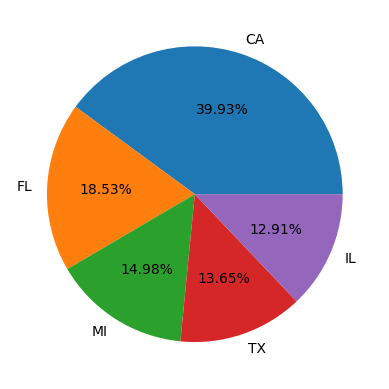

In [856]:
PropertyState_values=df.PropertyState.value_counts().values
PropertyState_name=df.PropertyState.value_counts().index
plt.pie(PropertyState_values[:5],labels=PropertyState_name[:5],autopct='%1.2f%%')

#### TOP 5 ServicerName

([<matplotlib.patches.Wedge at 0x7cf1ef024400>,
 [Text(0.42843483246443553, 1.0131355261420711, 'Other servicers     '),
  Text(-1.0980264807934887, 0.0658623373125072, 'COUNTRYWIDE         '),
  Text(-0.47030208398302703, -0.9943922514788729, 'WASHINGTONMUTUALBANK'),
  Text(0.4741010968053645, -0.9925865957224843, 'BANKOFAMERICANA    '),
  Text(1.0358310831851476, -0.3702080051909788, 'ABNAMROMTGEGROUPINC')],
 [Text(0.233691726798783, 0.5526193778956751, '37.27%'),
  Text(-0.5989235349782666, 0.035924911261367556, '23.56%'),
  Text(-0.25652840944528743, -0.5423957735339306, '14.28%'),
  Text(0.2586005982574715, -0.5414108703940823, '13.96%'),
  Text(0.5649987726464442, -0.2019316391950793, '10.93%')])

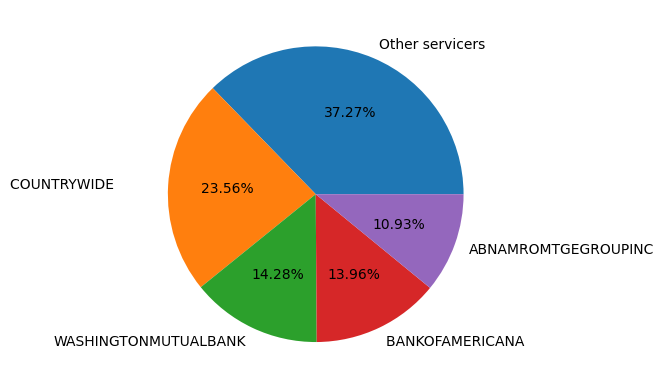

In [857]:
ServicerName_values=df.ServicerName.value_counts().values
ServicerName_name=df.ServicerName.value_counts().index
plt.pie(ServicerName_values[:5],labels=ServicerName_name[:5],autopct='%1.2f%%')

#### TOP 5 SellerName

([<matplotlib.patches.Wedge at 0x7cf1eec36e60>,
 [Text(0.07605238359012186, 1.0973677756113769, 'Ot'),
  Text(-0.9405855321134611, -0.5703497670542501, 'CO'),
  Text(0.10550959117898638, -1.0949281831103095, 'ST'),
  Text(0.8050307161927778, -0.749616932830458, 'FL'),
  Text(1.0706441762654533, -0.2524302831057902, 'NO')],
 [Text(0.04148311832188464, 0.5985642412425691, '47.80%'),
  Text(-0.5130466538800696, -0.31109987293868185, '21.76%'),
  Text(0.05755068609762893, -0.5972335544238051, '13.95%'),
  Text(0.4391076633778787, -0.408881963362068, '9.13%'),
  Text(0.583987732508429, -0.137689245330431, '7.37%')])

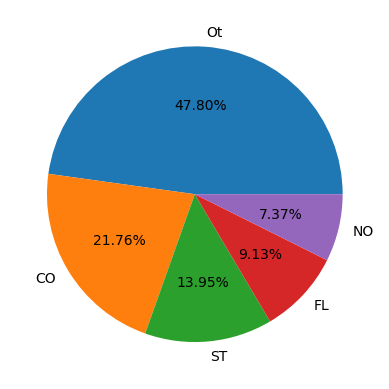

In [858]:
SellerName_values=df.SellerName.value_counts().values
SellerName_name=df.SellerName.value_counts().index
plt.pie(SellerName_values[:5],labels=SellerName_name[:5],autopct='%1.2f%%')

### Drop Features
Drop those feature which is modified and unimportant

In [859]:
df.drop(['OrigLoanTerm','FirstPaymentDate','MaturityDate','FirstPayment_month','MaturityDate_month','OrigInterestRate','SellerName','ServicerName', 'PropertyState','DTI','LTV','OCLTV',"EMI_Remains",'MonthsInRepayment','OrigUPB',"MIP",'Loan_tenure_month','MonthsDelinquent'],inplace = True, axis = 1)

In [860]:
df.head()

,CreditScore,FirstTimeHomebuyer,MSA,Units,Occupancy,Channel,PPM,PropertyType,LoanPurpose,NumBorrowers,EverDelinquent,FirstPayment_year,MaturityDate_year,EMI_Remains_years,Current_Year,Loan_tenure_year,InterestRate,DTI_Range,LTV_Aprox,OCLTV_Aprox,UPB,Delinquent_chance
0,403,N,16974,1,P,T,N,SF,P,2,0,1999,2029,25,2004,30,4-5 %,20-30 %,100,100,100000 to 200000,less
1,403,N,19740,1,P,R,N,SF,N,1,0,1999,2029,18,2011,30,4-5 %,10-20 %,100,100,100000 to 200000,less
2,403,N,29940,1,P,T,N,SF,N,2,0,1999,2029,24,2005,30,4-5 %,10-20 %,100,100,7000 to 100000,less
3,403,N,31084,1,P,R,N,SF,N,2,0,1999,2029,27,2002,30,4-5 %,10-20 %,100,100,100000 to 200000,less
4,403,N,35644,1,P,R,N,SF,N,2,0,1999,2029,25,2004,30,4-5 %,10-20 %,100,100,100000 to 200000,less


In [861]:
df_clean=df.copy() #create copy of cleaned data

### Data Transformation:
- In data transformation, columns like 'CreditScore', 'DTI', 'LTV', and 'MonthsDelinquent' are grouped into specific category ranges based on their values.

#### Converting "CreditScore" into credit score ranges like  Poor, Fair, Good and Excellent:

| Credit Score Range | Description                                                  |
|--------------------|--------------------------------------------------------------|
| 0 - 649         | Poor: Generally indicates a high-risk borrower. May have a history of missed payments, defaults, or bankruptcy. Credit options may be limited and come with higher interest rates. |
| 650 - 699          | Fair: Suggests a moderate-risk borrower. Some late payments or credit utilization nearing the upper limit may be present. Access to credit may be available, but terms and rates might not be the most favorable. |
| 700 - 749          | Good: Represents a low-risk borrower. Typically, payments are made on time, and credit utilization is moderate. This range often qualifies for most credit products with reasonable terms and rates. |
| 750 - 900     | Excellent: Indicates a very low-risk borrower. Demonstrates responsible credit behavior with a history of on-time payments, low credit utilization, and a mix of credit types. Offers the best terms, rates, and access to credit products. |

In [862]:
df['CreditScoreRange'] =  pd.cut(df['CreditScore'],[0,650,700,750,900],4,labels=["poor","fair","good","excellent"])

#### Converting "LTV" into LTV ranges linto Low, Medium and High:

| LTV Range   | Description                                                                                                  |
|-------------|--------------------------------------------------------------------------------------------------------------|
| 0 - 24      | Low: Indicates a low loan-to-value ratio. Borrowers in this range have substantial equity or down payment.   |
| 25 - 49     | Medium: Represents a moderate loan-to-value ratio. Borrowers in this range have a balanced equity position. |
| 49 - 200| High: Indicates a high loan-to-value ratio. Borrowers in this range have relatively little equity or down payment, which may pose higher risks. |


### Statistical data analysis

In [863]:
# only for continuos variable
df.describe(exclude=[object]).T.style.background_gradient(cmap='viridis')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,213262.000000,nan,nan,nan,710.380082,54.993540,335.000000,675.000000,717.000000,752.000000,849.000000
MSA,213262.000000,nan,nan,nan,30669.301535,10511.844180,10180.000000,20764.000000,29820.000000,39300.000000,49740.000000
Units,213262.000000,nan,nan,nan,1.022939,0.187028,0.000000,1.000000,1.000000,1.000000,4.000000
NumBorrowers,213262.000000,nan,nan,nan,1.636714,0.480947,1.000000,1.000000,2.000000,2.000000,2.000000
EverDelinquent,213262.000000,nan,nan,nan,0.195234,0.396382,0.000000,0.000000,0.000000,0.000000,1.000000
FirstPayment_year,213262.000000,nan,nan,nan,1999.008314,0.153123,1999.000000,1999.000000,1999.000000,1999.000000,2013.000000
MaturityDate_year,213262.000000,nan,nan,nan,2028.995156,0.143377,2024.000000,2029.000000,2029.000000,2029.000000,2043.000000
EMI_Remains_years,213262.000000,nan,nan,nan,24.488685,3.781210,7.000000,24.000000,26.000000,27.000000,29.000000
Current_Year,213262.000000,nan,nan,nan,2004.506471,3.779364,1999.000000,2002.000000,2003.000000,2005.000000,2031.000000
Loan_tenure_year,213262.000000,nan,nan,nan,29.982927,0.216552,25.000000,30.000000,30.000000,30.000000,30.000000


### Segregate the numerical and Categorical variables

In [864]:
categorical = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical].sample(5)

,FirstTimeHomebuyer,Occupancy,Channel,PPM,PropertyType,LoanPurpose,InterestRate,DTI_Range,UPB,Delinquent_chance
99622,N,P,T,N,SF,C,4-5 %,10-20 %,7000 to 100000,less
140844,N,P,R,N,SF,N,4-5 %,40-50 %,100000 to 200000,less
254245,N,P,T,N,CO,P,4-5 %,30-40 %,100000 to 200000,less
128734,N,P,T,N,SF,N,4-5 %,40-50 %,7000 to 100000,less
184640,N,P,T,N,CO,C,4-5 %,20-30 %,7000 to 100000,less


In [865]:
numerical = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical].sample(5)

,CreditScore,MSA,Units,NumBorrowers,EverDelinquent,FirstPayment_year,MaturityDate_year,EMI_Remains_years,Current_Year,Loan_tenure_year,LTV_Aprox,OCLTV_Aprox,CreditScoreRange
59892,666,13820,1,1,0,1999,2029,25,2004,30,100,100,fair
206098,747,19124,1,2,0,1999,2029,26,2003,30,80,80,good
154445,722,36260,1,2,0,1999,2029,26,2003,30,100,100,good
25360,636,13820,1,1,0,1999,2029,24,2005,30,80,80,poor
20330,630,35004,1,1,0,1999,2029,18,2011,30,100,100,poor


#Exploratory Data Analysis

## Univariate Visualization

### Pie Chart
Findout how much percent borrowers is Delinquent or not.

0- not Delinquent

1- Delinquent

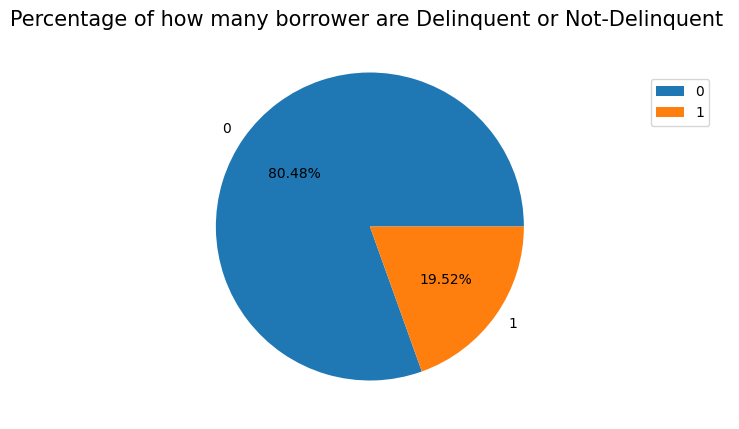

In [866]:
plt.figure(figsize=(5,5))
plt.pie(df['EverDelinquent'].value_counts(), labels = df['EverDelinquent'].unique(), autopct = '%.2f%%')
plt.title('Percentage of how many borrower are Delinquent or Not-Delinquent ', fontsize=15)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9))

80.22% of borrowers are not Delinquent

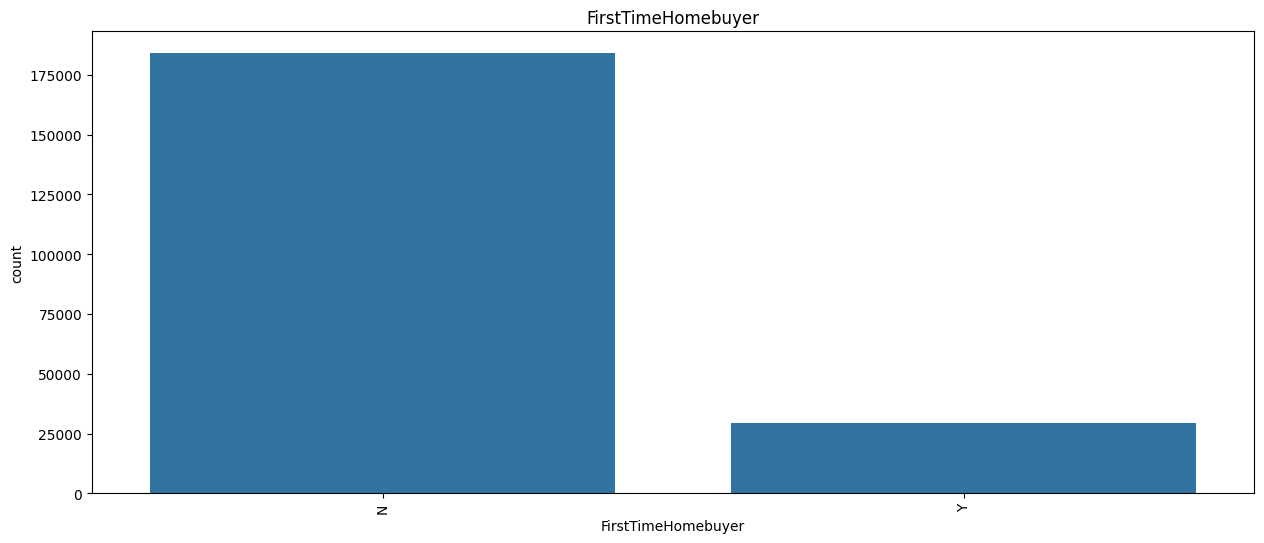

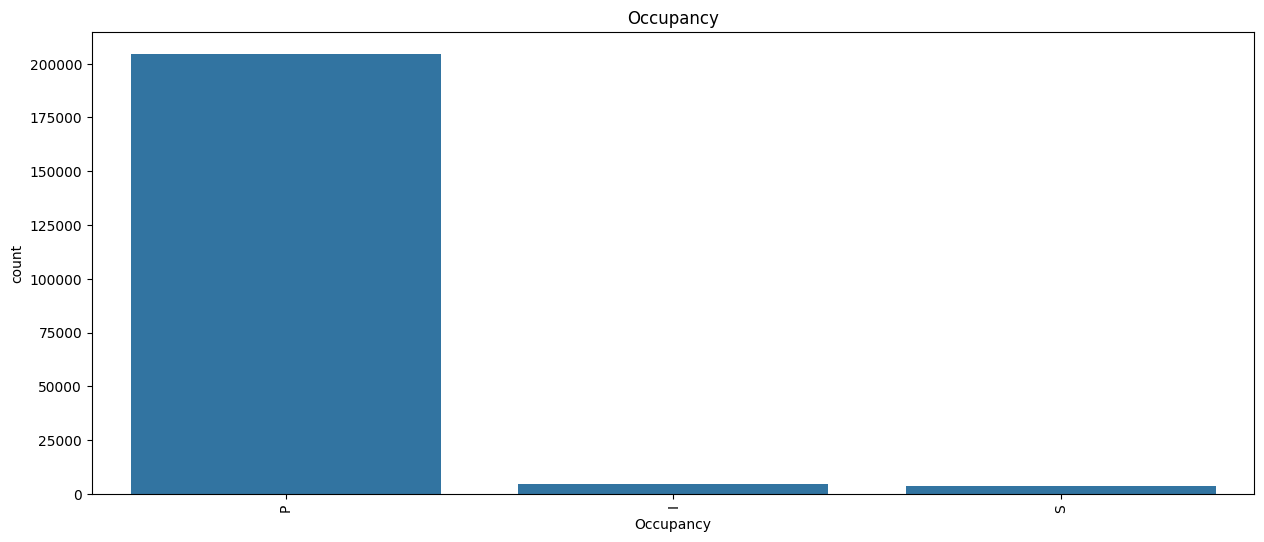

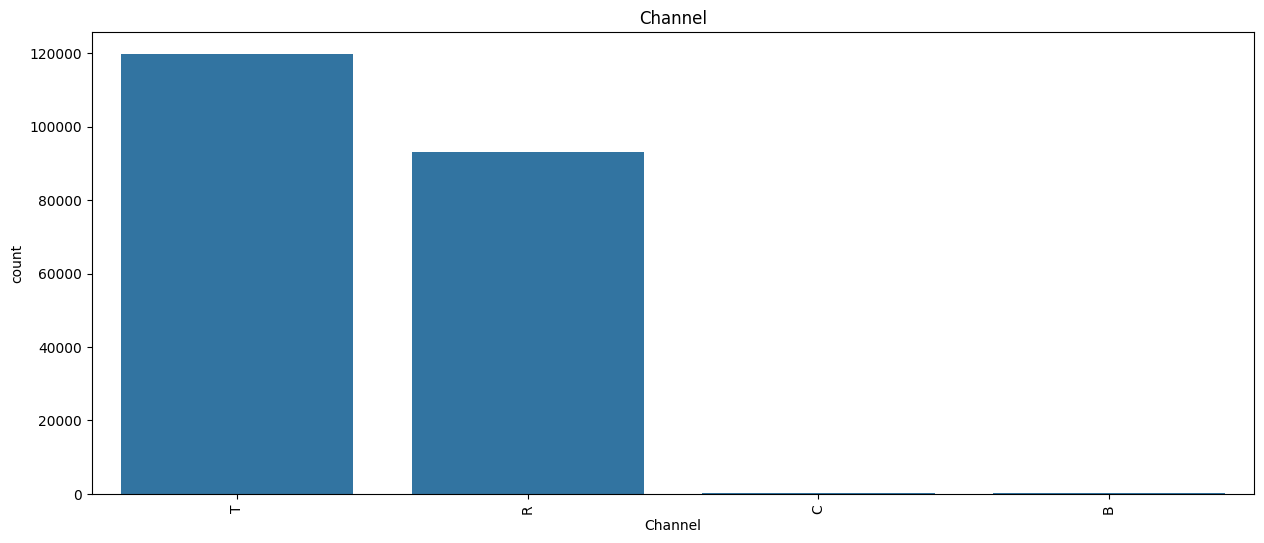

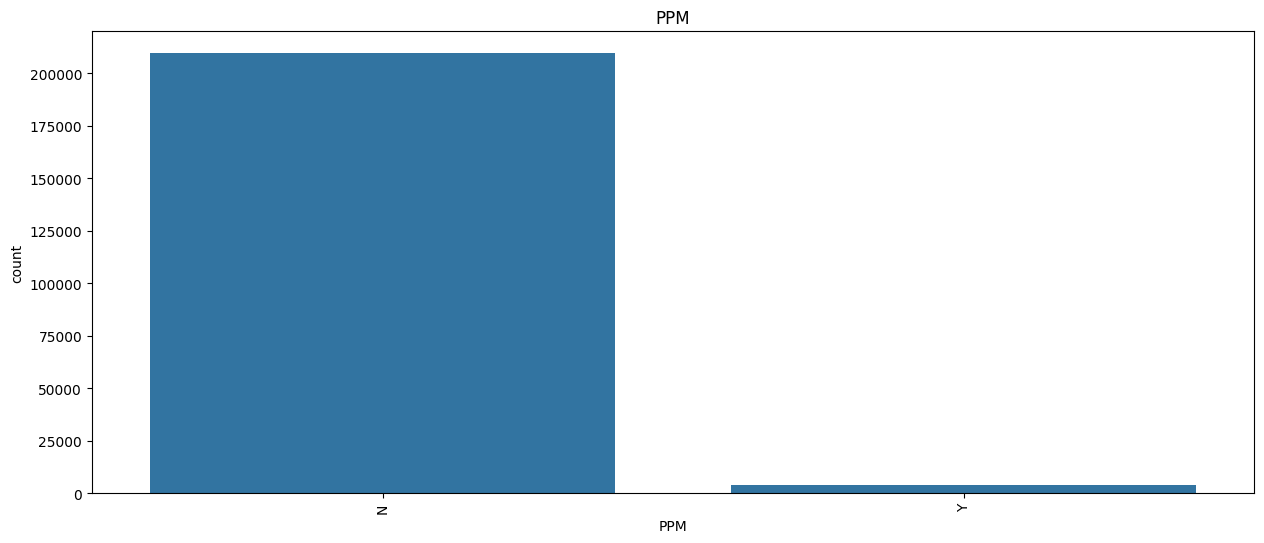

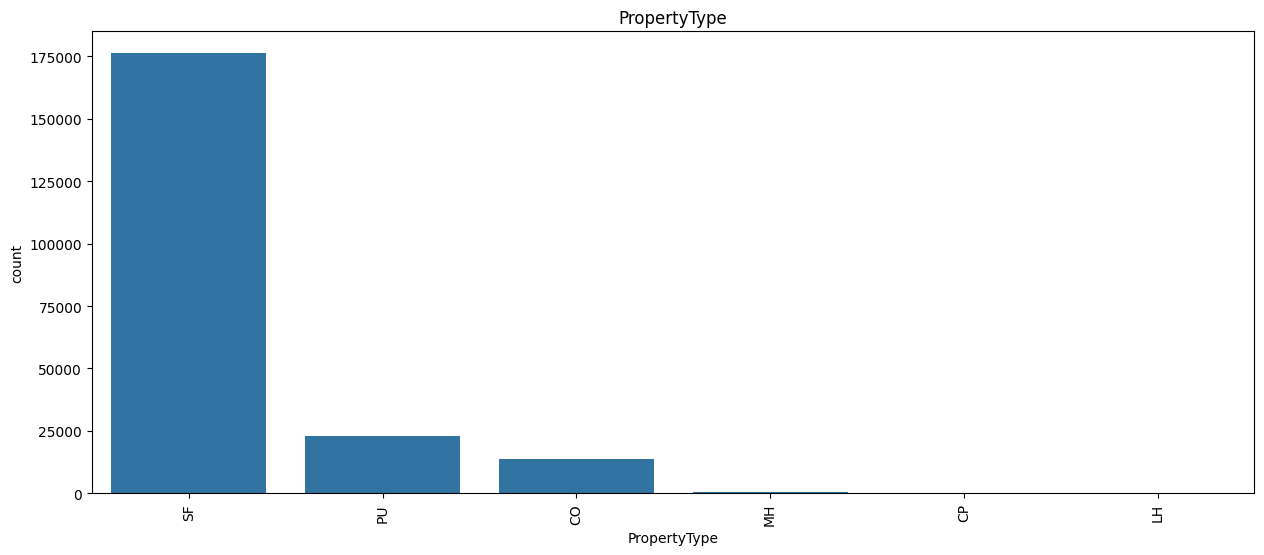

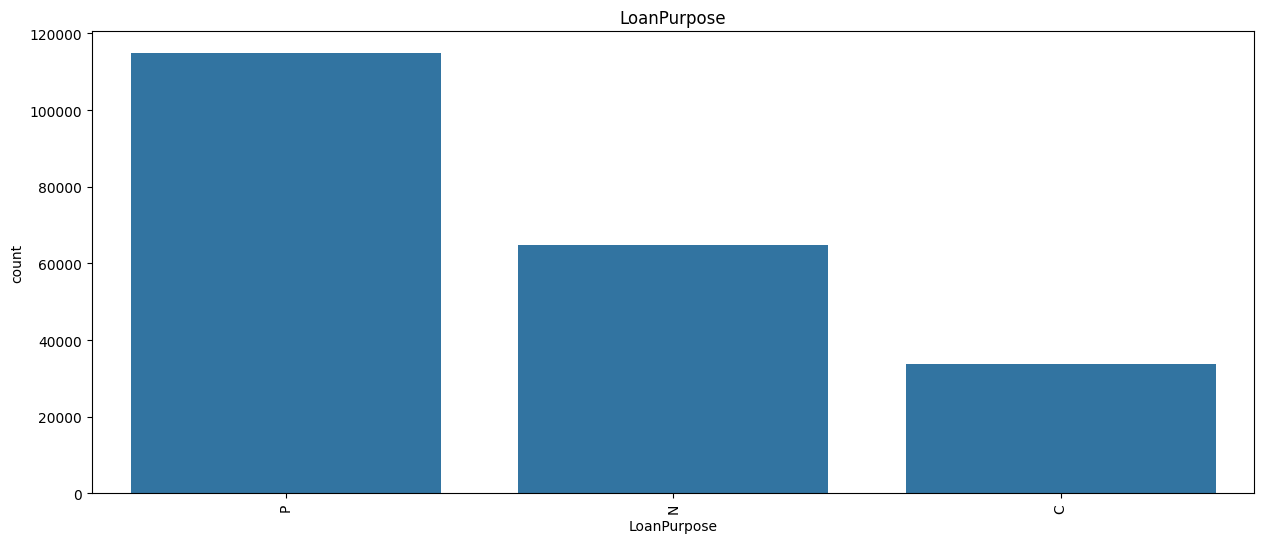

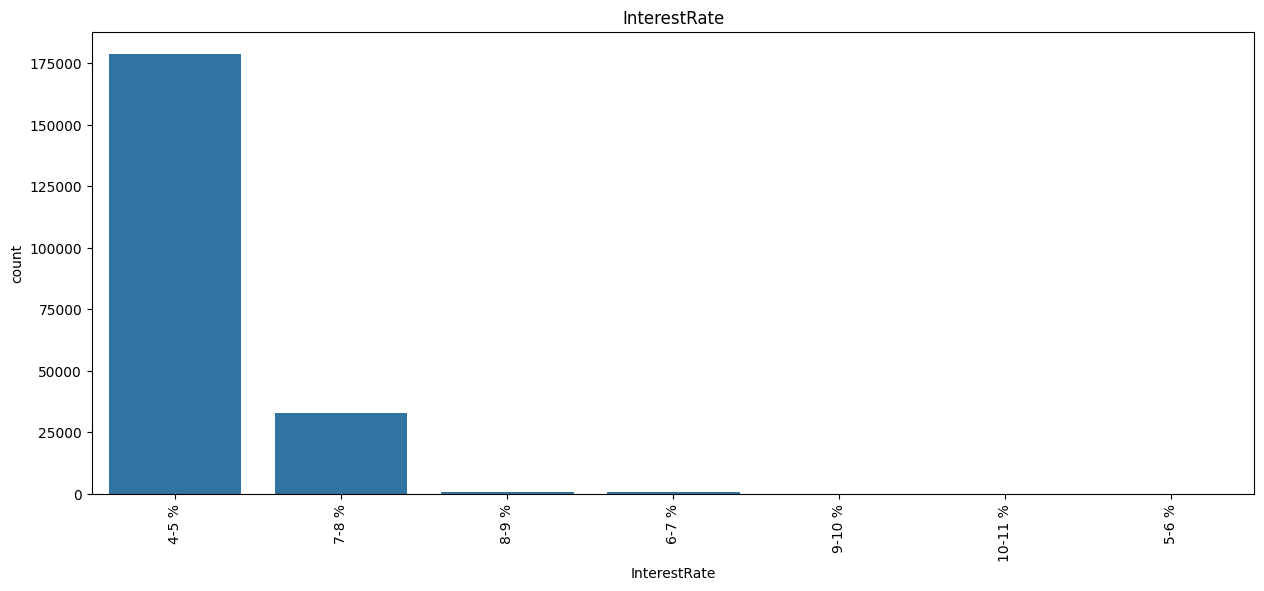

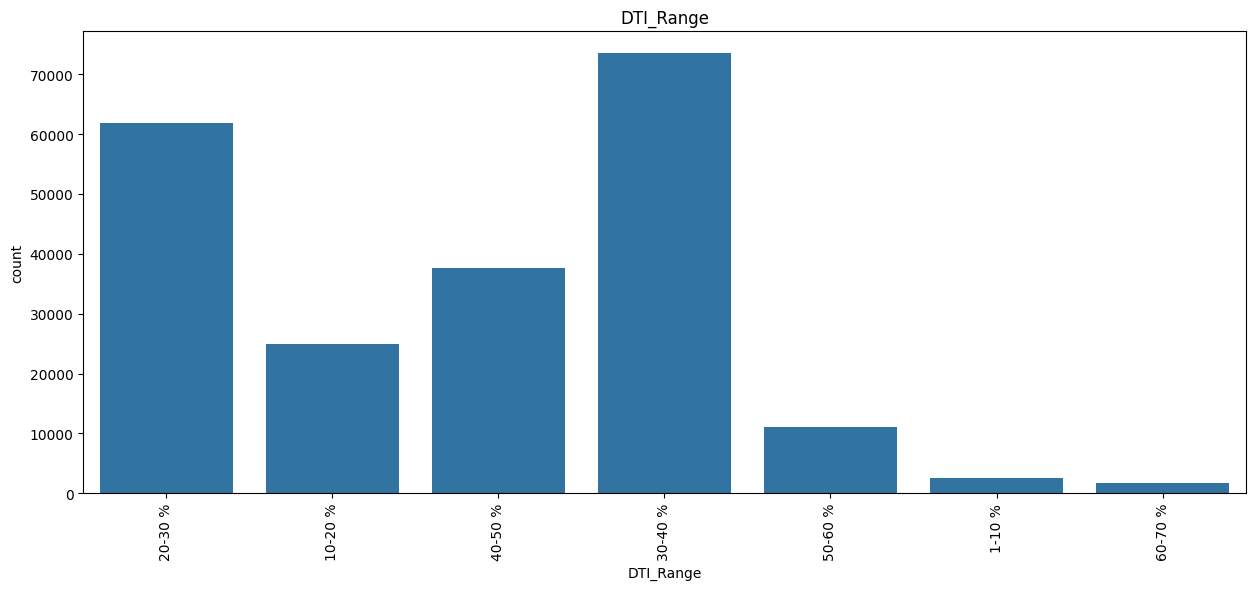

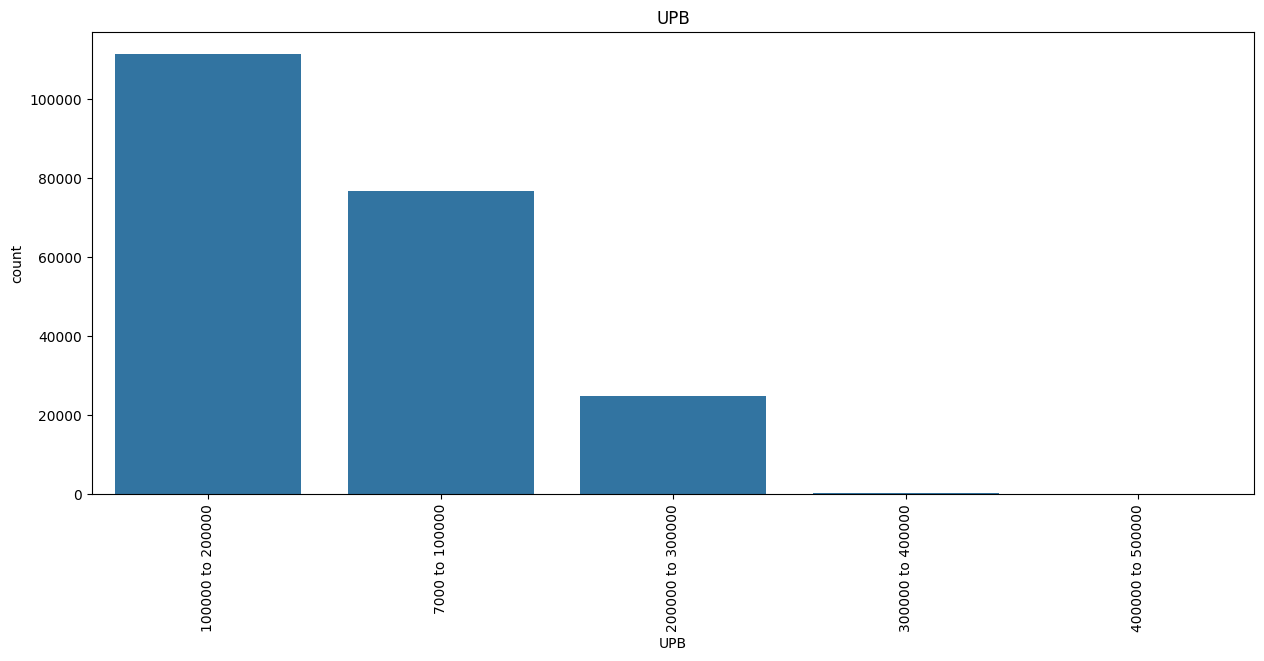

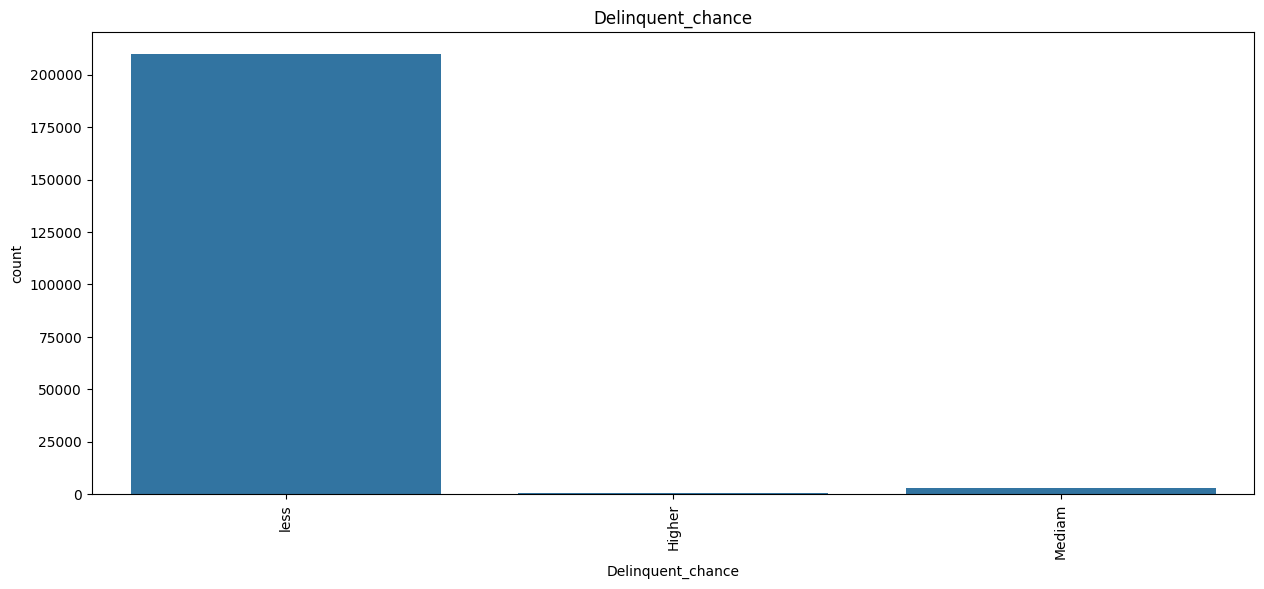

In [867]:
for i in df[categorical]:
    plt.figure(figsize = (15, 6))
    sns.countplot(x=df[i],data=df[categorical])
    plt.title(i)
    plt.xticks(rotation=90)

#### Observation :

1. No of borrowers who has HirstTimeHomeBuyer is less .
2. No of Primary occupancy is higher as compare to secondry and Investment
3. Retai and Third Party  delivered the loan in higher quantity to the issuer as compare to Correspondent and Broker.
4. Only few No of loans are there that has penalty for early payment of principal .
5. No. of loan is higher for the interest rate between 4 to 5%.
6. Loan porpose for Purchase is higher than Refinance - Cash Out and Refinance - No Cash Out.
7. Higher amount of Single-Family type of property is present there that secures the loan
8. Higher no. of loan is present their DTI range is 30 to 40 %.
9. Higheron. of loan present which unpaid principle balance is 100000 to 200000.
10. Higheron. of loans are there which chance of delinquency is lesser.

In [912]:
#Removing date columns  'FirstPaymentDate' and  'MaturityDate'
numerical_columns=['OCLTV',  'OrigUPB', 'OrigInterestRate', 'NumBorrowers', 'Units', 'OrigLoanTerm', 'MonthsDelinquent']

<ipython-input-920-359d1e2cd7ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["NumBorrowers"], palette='viridis')


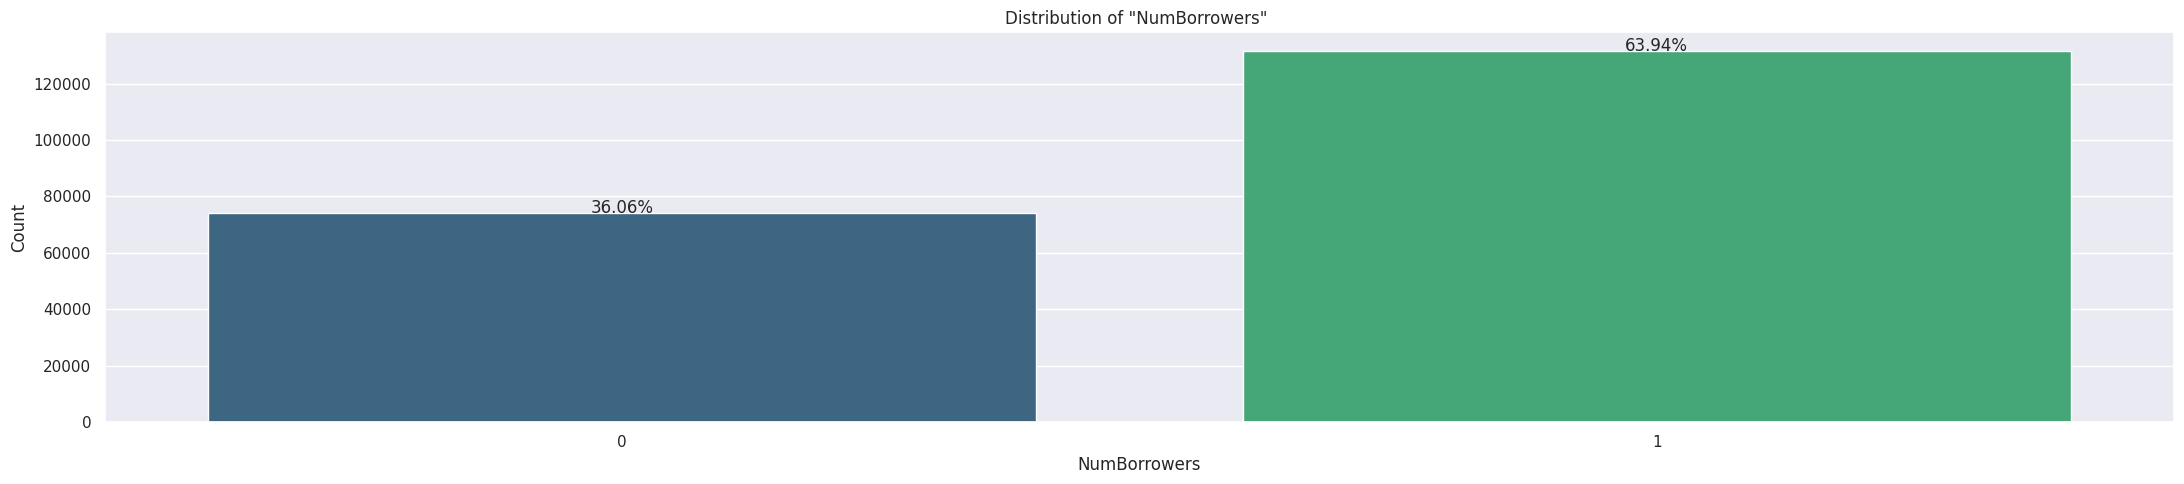

In [920]:
#'NumBorrowers'
percentage = df['NumBorrowers'].value_counts(normalize=True) * 100
plt.figure(figsize=(22, 5))
ax = sns.countplot(x=df["NumBorrowers"], palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.text( p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / len(df)) * 100),ha='center'
            )
plt.xlabel('NumBorrowers')
plt.ylabel('Count')
plt.title('Distribution of "NumBorrowers" ')
plt.tight_layout()
plt.show()

<ipython-input-918-3ea2cb3eed4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Units'], palette='viridis')


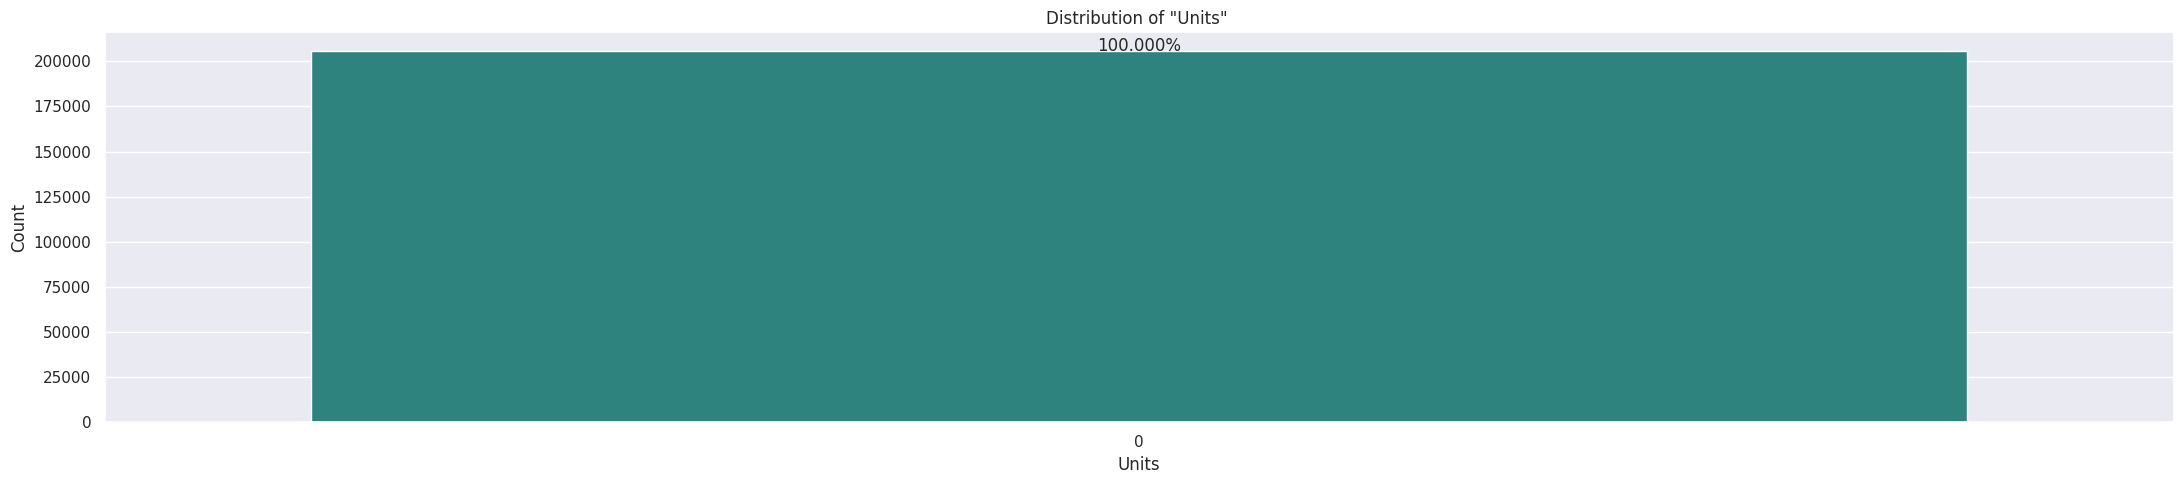

In [918]:
#'Units'
percentage = df['Units'].value_counts(normalize=True) * 100
plt.figure(figsize=(22, 5))
ax = sns.countplot(x=df['Units'], palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.text( p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.3f}%'.format((height / len(df)) * 100),ha='center'
            )
plt.xlabel('Units')
plt.ylabel('Count')
plt.title('Distribution of "Units" ')
plt.tight_layout()
plt.show()

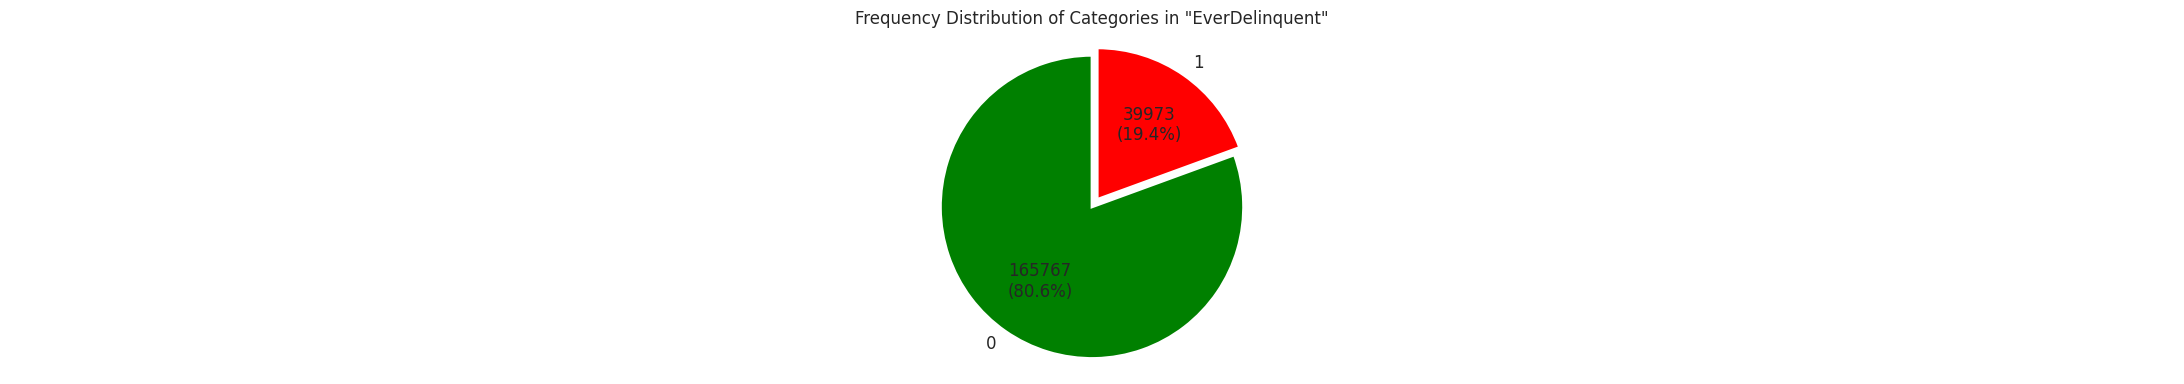

In [923]:
# EverDelinquent
#Pie chart
plt.figure(figsize=(22,4))
violet_colors = ["green","red"]
#------------------------------------------------------------------------------------------------
outcome_counts = df['EverDelinquent'].value_counts()
labels = outcome_counts.index.tolist()
counts = outcome_counts.values.tolist()
explode = [0.03] * len(counts)
plt.pie(counts, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(counts) / 100, p), startangle=90, explode=explode, colors=violet_colors,textprops={'fontsize': 12}, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Frequency Distribution of Categories in "EverDelinquent"',fontsize=12)
#------------------------------------------------------------------------------------------------
plt.tight_layout()
plt.show()

In [925]:
#Function for countplot
def count_plot (column):
        custom_cmap = "viridis"
        plt.figure(figsize=(22, 6))
        sns.countplot(x=column, data=df, palette=custom_cmap)
        plt.title(f"Count Plot of {column}")
        plt.xlabel("")
        plt.ylabel("Count")
        total = len(df[column])
        for p in plt.gca().patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            if column == 'ServicerName':
                  plt.xticks(rotation=90)
            plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')
        plt.tight_layout()
        plt.show()

### Box plot for detecting outliers

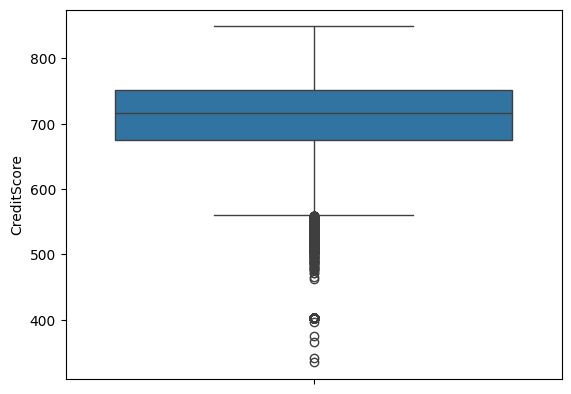

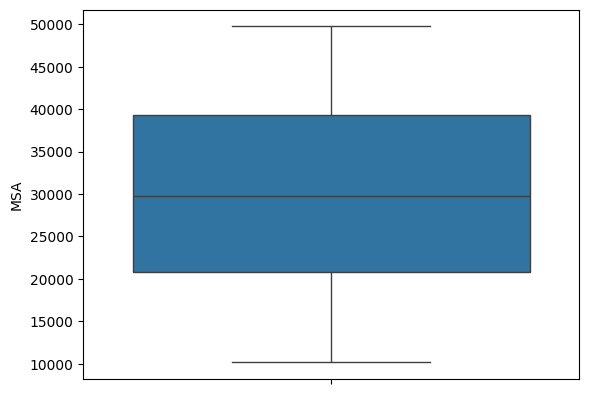

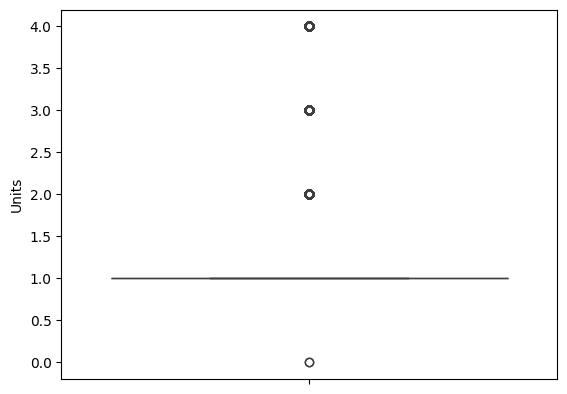

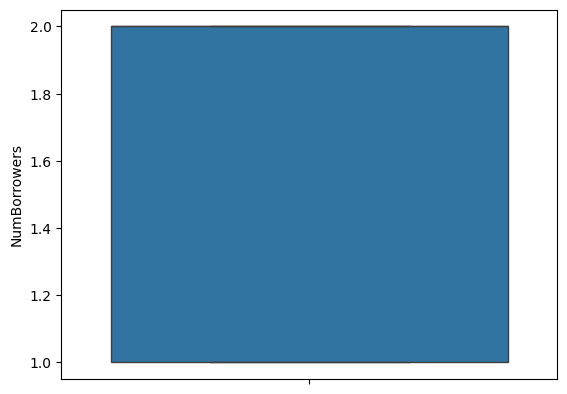

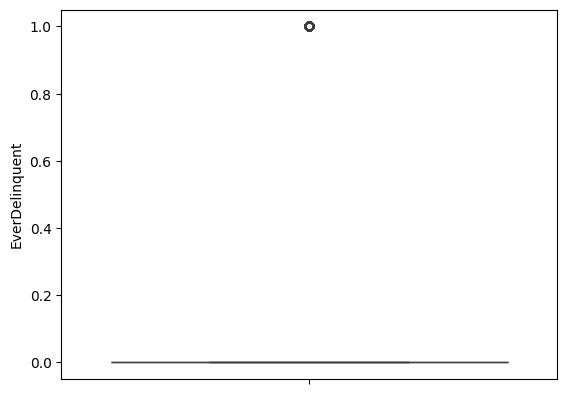

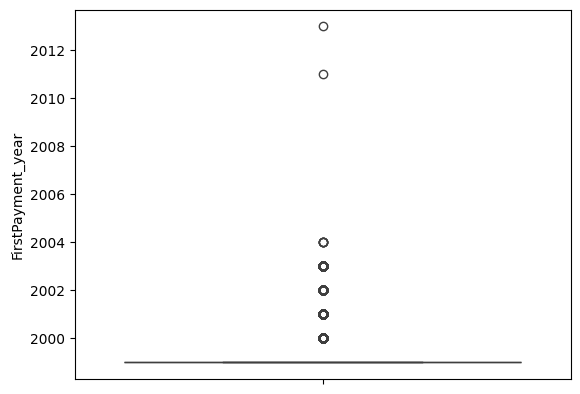

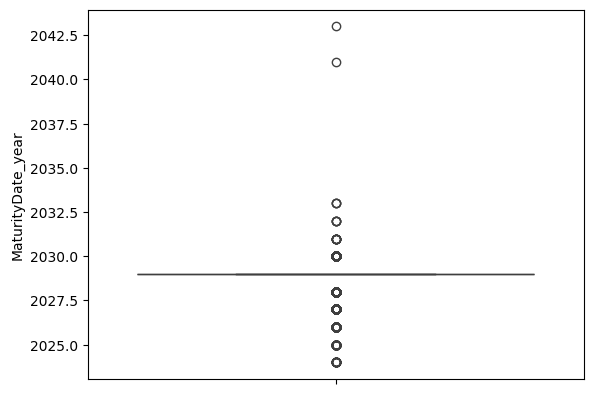

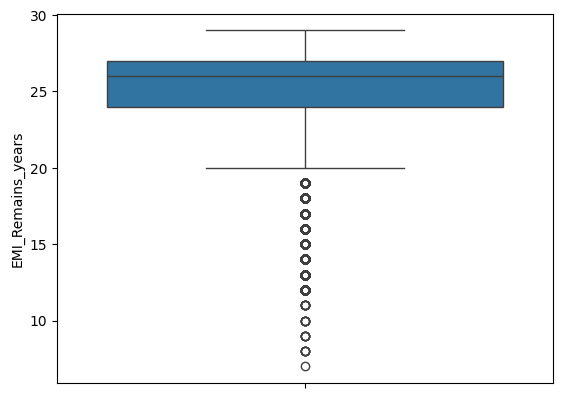

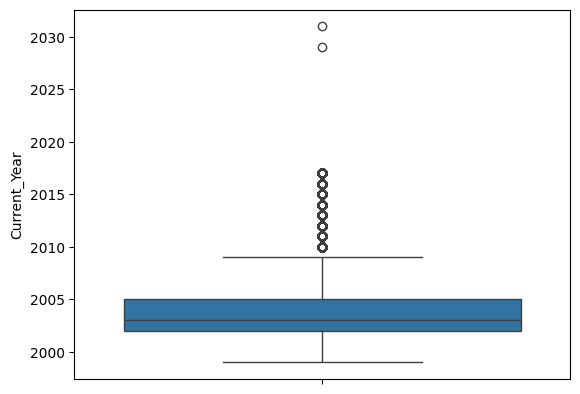

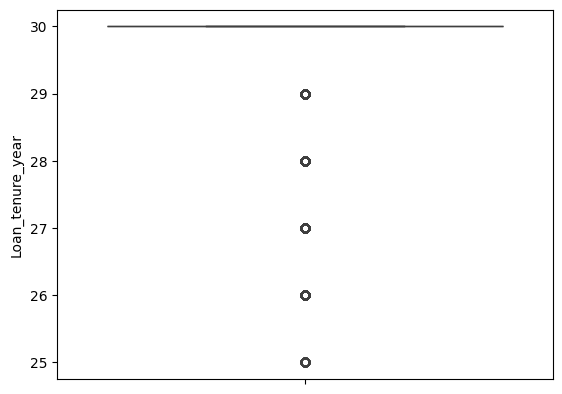

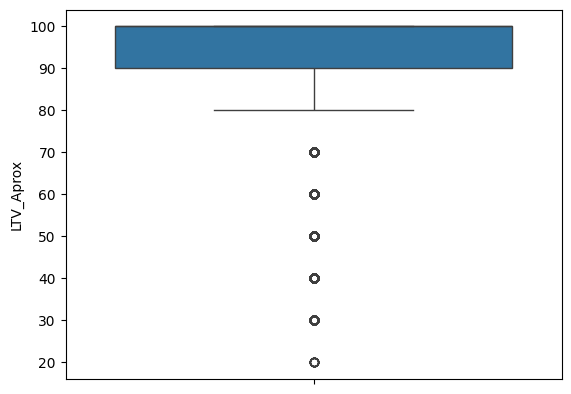

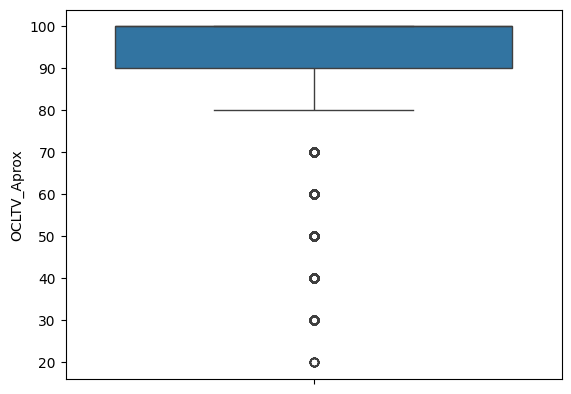

In [868]:
#box plot for each columns that contain continues variable

for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

Outlies present in most of the column so we have to remove it by using z_score or IQR  technique

### Density Plot
Density plot for detecting Skewness present in numerical features

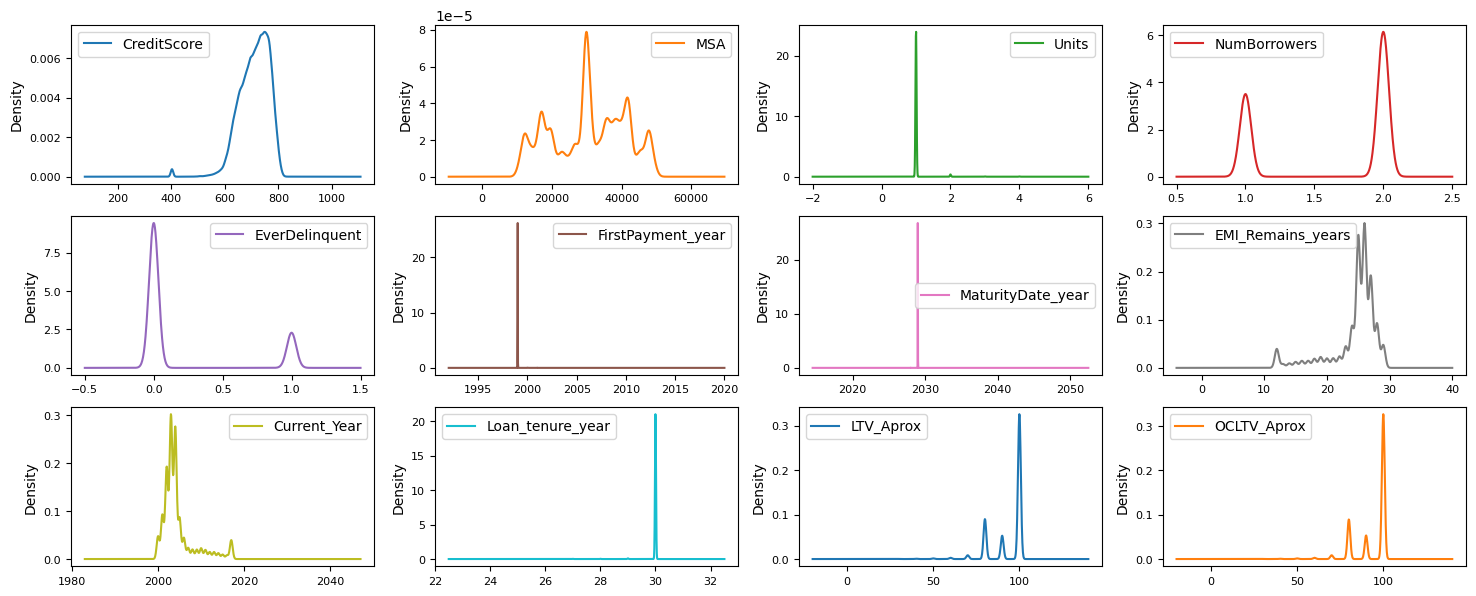

In [869]:
df.plot(kind="density",subplots=True,layout=(5,4),fontsize=8,figsize=(18,12),sharex=False)
plt.show()

Skewness present in most of the column so we can remove it later

## Bivariate Visualization

#### Relationship between Categorical variable and Target Variable

### Crosstab
frequency for the different combination of two value occures

In [870]:
pd.crosstab(df.FirstTimeHomebuyer,df.EverDelinquent)

EverDelinquent,0,1
FirstTimeHomebuyer,,
N,148217,35771
Y,23409,5865


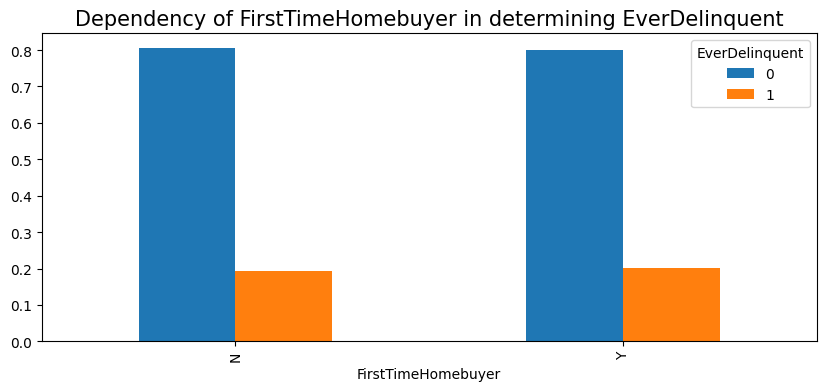

In [871]:
data=pd.crosstab(df['FirstTimeHomebuyer'], df['EverDelinquent'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,4))
plt.title('Dependency of FirstTimeHomebuyer in determining EverDelinquent', fontsize=15)
plt.xlabel('FirstTimeHomebuyer')
plt.show()

Higher no. of borrowers is not Deliquent who had not FirstTimeHomebuyer.

In [872]:
pd.crosstab(df.Occupancy,df.EverDelinquent)

EverDelinquent,0,1
Occupancy,,
I,3756,1072
P,164680,39827
S,3190,737


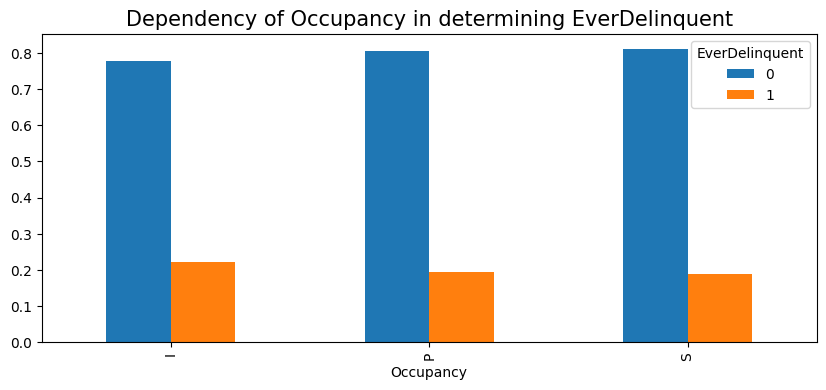

In [873]:
pd.crosstab(df.Occupancy,df.EverDelinquent)
data=pd.crosstab(df['Occupancy'], df['EverDelinquent'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,4))
plt.title('Dependency of Occupancy in determining EverDelinquent', fontsize=15)
plt.xlabel('Occupancy')
plt.show()

The borrowes who had primary occupacy had more  chance of not Delenquent.

In [874]:
pd.crosstab(df.InterestRate,df.EverDelinquent)

EverDelinquent,0,1
InterestRate,,
10-11 %,1,2
4-5 %,143877,34930
5-6 %,11,1
6-7 %,559,109
7-8 %,26616,6380
8-9 %,530,197
9-10 %,32,17


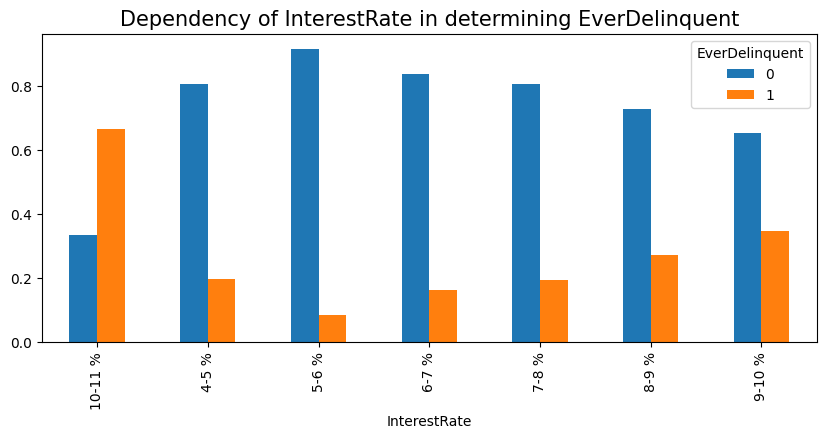

In [875]:
pd.crosstab(df.InterestRate,df.EverDelinquent)
data=pd.crosstab(df['InterestRate'], df['EverDelinquent'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,4))
plt.title('Dependency of InterestRate in determining EverDelinquent', fontsize=15)
plt.xlabel('InterestRate')
plt.show()

If the interest rate higher (10-11%)then the chance of Delinquent is also higher

In [876]:
pd.crosstab(df.LoanPurpose,df.EverDelinquent)

EverDelinquent,0,1
LoanPurpose,,
C,26709,6971
N,52116,12669
P,92801,21996


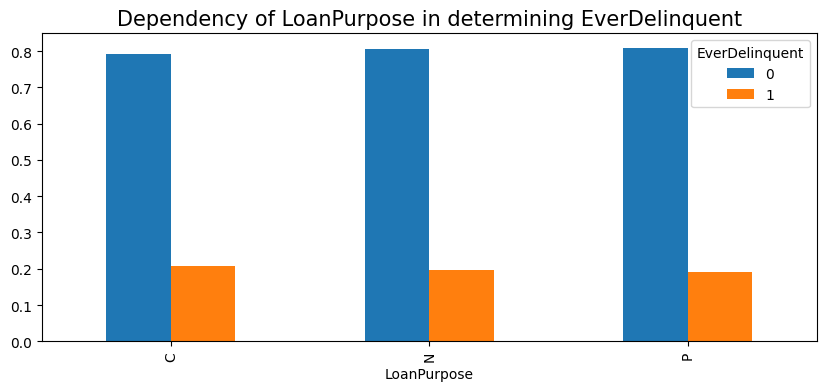

In [877]:
pd.crosstab(df.LoanPurpose,df.EverDelinquent)
data=pd.crosstab(df['LoanPurpose'], df['EverDelinquent'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,4))
plt.title('Dependency of LoanPurpose in determining EverDelinquent', fontsize=15)
plt.xlabel('LoanPurpose')
plt.show()

If loan purpose is purchase then the chance of delinquent is lower.

In [878]:
pd.crosstab(df.PropertyType,df.EverDelinquent)

EverDelinquent,0,1
PropertyType,,
CO,11373,2239
CP,49,14
LH,51,9
MH,343,138
PU,18949,3927
SF,140861,35309


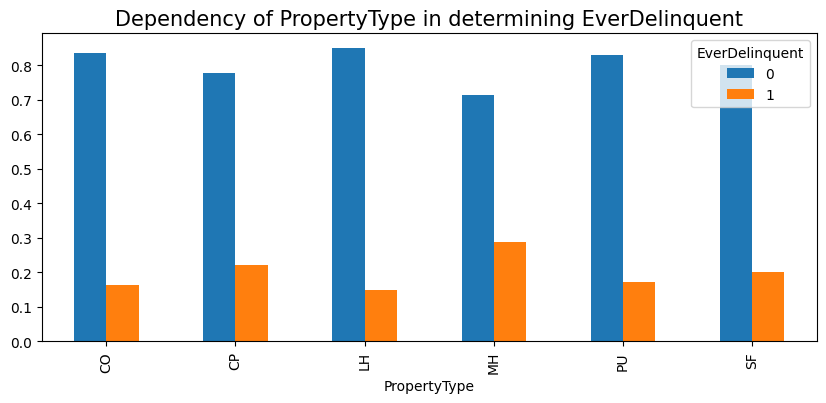

In [879]:
pd.crosstab(df.FirstTimeHomebuyer,df.EverDelinquent)
data=pd.crosstab(df['PropertyType'], df['EverDelinquent'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,4))
plt.title('Dependency of PropertyType in determining EverDelinquent', fontsize=15)
plt.xlabel('PropertyType')
plt.show()

For single family property type chance of delinquent is less.

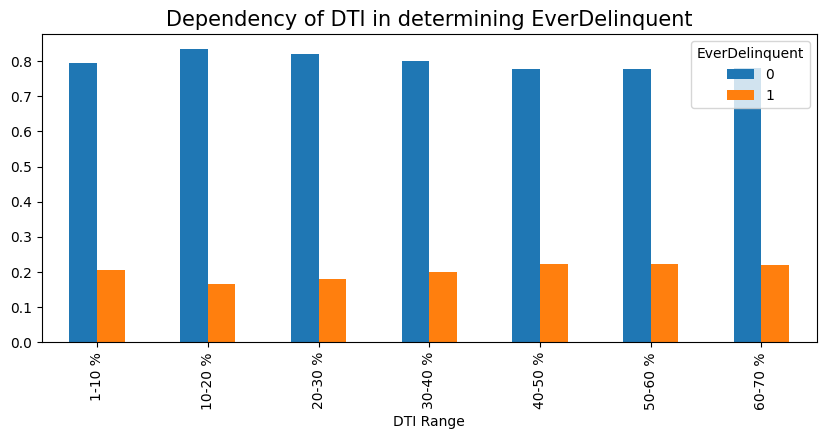

In [880]:
pd.crosstab(df.DTI_Range,df.EverDelinquent)
data=pd.crosstab(df['DTI_Range'], df['EverDelinquent'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,4))
plt.title('Dependency of DTI in determining EverDelinquent', fontsize=15)
plt.xlabel('DTI Range')
plt.show()

When the DTI percentage is less then the chance of delinquent is also less.

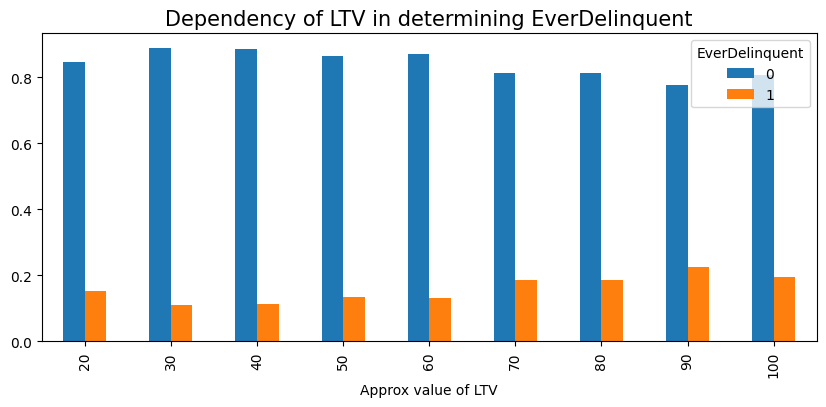

In [881]:
pd.crosstab(df.LTV_Aprox,df.EverDelinquent)
data=pd.crosstab(df['LTV_Aprox'], df['EverDelinquent'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,4))
plt.title('Dependency of LTV in determining EverDelinquent', fontsize=15)
plt.xlabel('Approx value of LTV' )
plt.show()

If the LTV percentage is nearby 30% then the chance of delinquent is less.

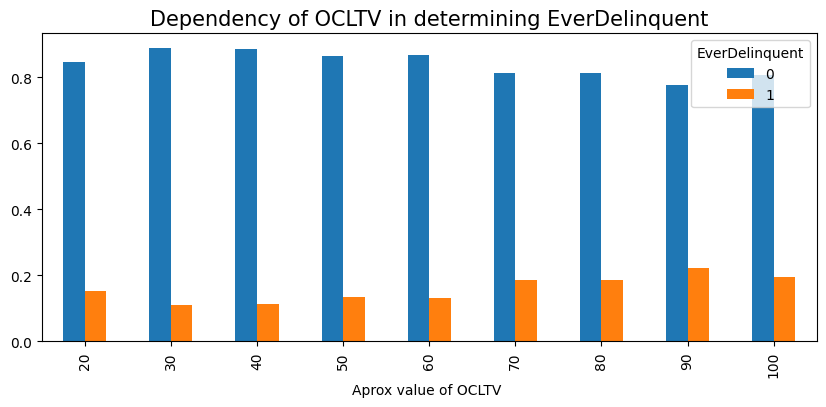

In [882]:
pd.crosstab(df.OCLTV_Aprox,df.EverDelinquent)
data=pd.crosstab(df['OCLTV_Aprox'], df['EverDelinquent'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,4))
plt.title('Dependency of OCLTV in determining EverDelinquent', fontsize=15)
plt.xlabel('Aprox value of OCLTV ')
plt.show()

If the OCLTV percentage is nearby 30% then the chance of delinquent is less.

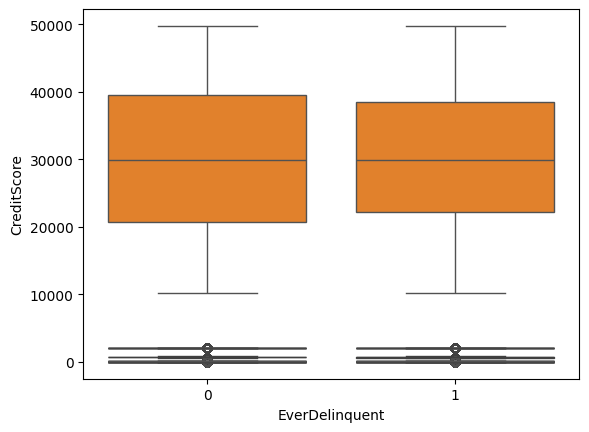

In [883]:
for i in df.describe().columns: sns.boxplot(y =df[i].dropna(),
         x ='EverDelinquent',
         data = df)
plt.show()

#### Observations:

1. when the creadit score between 700 to 800 then chance of delinquent is less.
2. if the month in Repayment is higher then the chance of Delinquent is also higher.
3. The chance of delinquency is low for the year 2002 to 2005 .

## Correlation


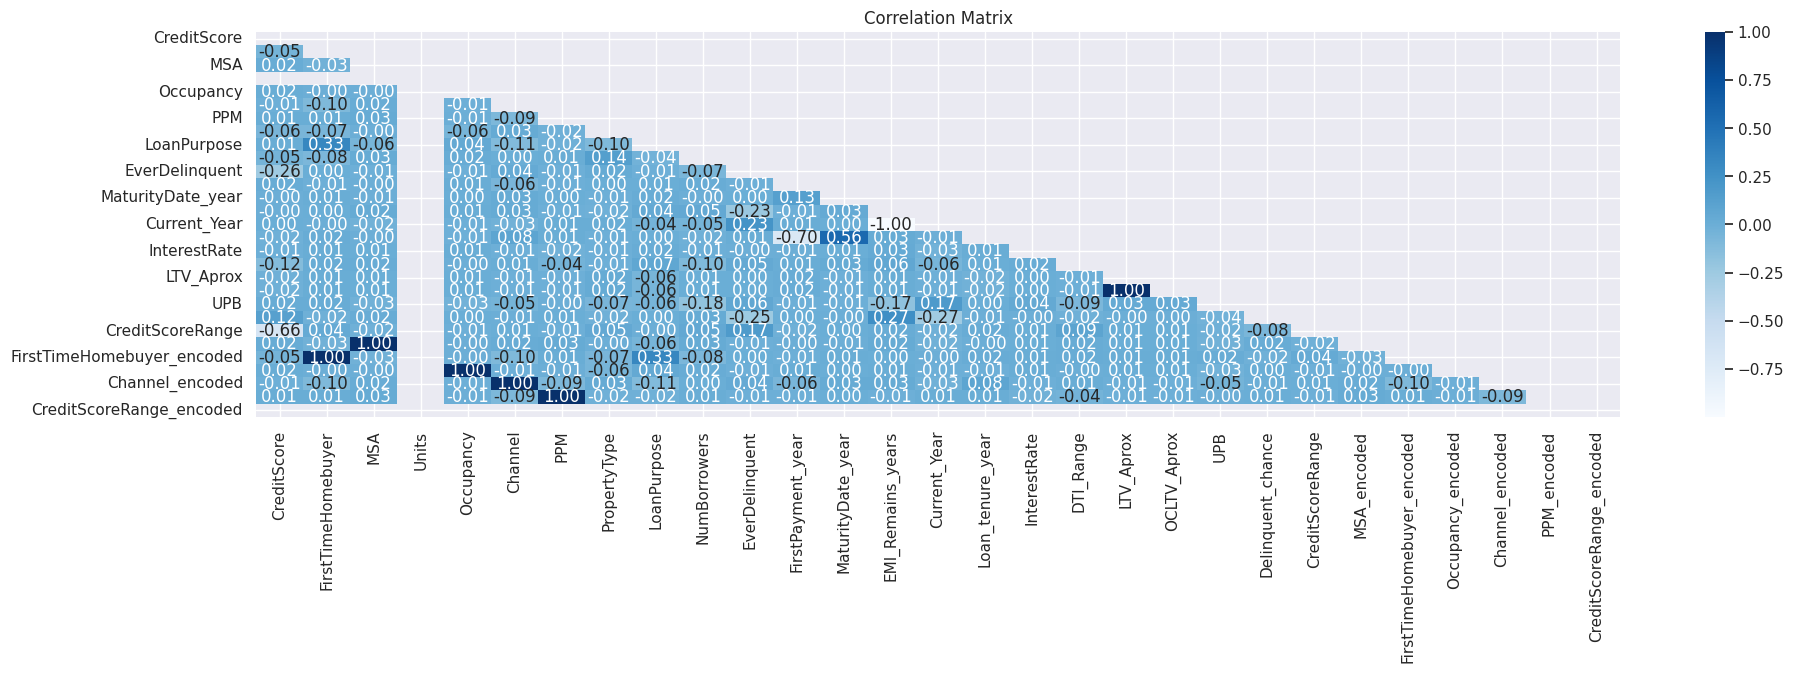

In [928]:
corr_matrix = df[df.columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heat map
plt.figure(figsize=(22, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

Observations:

- There is no noticeable correlation among the numerical variables.

In [929]:
#Import dependencies
from scipy.stats import chi2_contingency

## Data Preprocessing

### Remove outliers

In [885]:
outliers=df[['CreditScore','Units','LTV_Aprox','OCLTV_Aprox']]

In [886]:
z=np.abs(zscore(outliers))
df_out=df[(z<3).all(axis=1)]
df_out

,CreditScore,FirstTimeHomebuyer,MSA,Units,Occupancy,Channel,PPM,PropertyType,LoanPurpose,NumBorrowers,EverDelinquent,FirstPayment_year,MaturityDate_year,EMI_Remains_years,Current_Year,Loan_tenure_year,InterestRate,DTI_Range,LTV_Aprox,OCLTV_Aprox,UPB,Delinquent_chance,CreditScoreRange
1894,546,N,15764,1,P,R,N,SF,N,2,0,1999,2029,25,2004,30,7-8 %,10-20 %,100,100,100000 to 200000,less,poor
1895,546,N,37340,1,P,R,N,SF,N,2,1,1999,2029,27,2002,30,4-5 %,10-20 %,100,100,7000 to 100000,less,poor
1898,546,Y,20764,1,P,R,N,SF,P,1,0,1999,2029,28,2001,30,4-5 %,20-30 %,100,100,100000 to 200000,less,poor
1899,546,N,26580,1,P,R,N,SF,P,2,1,1999,2029,23,2006,30,4-5 %,20-30 %,100,100,7000 to 100000,less,poor
1900,546,N,31084,1,P,T,N,SF,P,2,0,1999,2029,25,2004,30,4-5 %,20-30 %,90,90,100000 to 200000,less,poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,N,37964,1,P,R,N,SF,N,2,0,1999,2029,29,2000,30,7-8 %,30-40 %,100,100,7000 to 100000,less,excellent
291447,840,N,35644,1,P,C,N,SF,P,2,0,2002,2029,22,2007,26,4-5 %,30-40 %,100,100,200000 to 300000,less,excellent
291448,840,N,42044,1,P,R,N,SF,N,1,0,2003,2029,22,2007,26,4-5 %,30-40 %,100,100,7000 to 100000,less,excellent
291449,845,N,37964,1,I,R,N,SF,P,2,0,1999,2029,27,2002,30,7-8 %,50-60 %,80,80,7000 to 100000,less,excellent


In [887]:
# checking the shape of new dataset
df_out.shape

(205740, 23)

In [888]:
# Checking No. of outliers removed
dataloss=print(df.shape[0]-df_out.shape[0])

7522


In [889]:
# Checking the Percentage of dataloss using zscore
datalossper=print(((df.shape[0]-df_out.shape[0])/df.shape[0])*100)

3.5271168797066523


In [890]:
df=df_out

We have just lost 3.6% of data which is quite good.

### Remove Skewness

In [891]:
skew=['CreditScore','NumBorrowers','OCLTV_Aprox','LTV_Aprox','MSA','LTV_Aprox','OCLTV_Aprox']

In [892]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method="yeo-johnson")
df[skew]=scaler.fit_transform(df[skew].values)
df[skew].skew()

<ipython-input-892-0f6c73e03b9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[skew]=scaler.fit_transform(df[skew].values)


CreditScore    -0.064895
NumBorrowers   -0.580645
OCLTV_Aprox    -0.856524
LTV_Aprox      -0.854917
MSA            -0.150549
LTV_Aprox      -0.854917
OCLTV_Aprox    -0.856524
dtype: float64

### Label Encoding:

In [893]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [894]:
#for changing all catigorical value into numeric value

df=df.apply(le.fit_transform)

In [895]:
df.head()

,CreditScore,FirstTimeHomebuyer,MSA,Units,Occupancy,Channel,PPM,PropertyType,LoanPurpose,NumBorrowers,EverDelinquent,FirstPayment_year,MaturityDate_year,EMI_Remains_years,Current_Year,Loan_tenure_year,InterestRate,DTI_Range,LTV_Aprox,OCLTV_Aprox,UPB,Delinquent_chance,CreditScoreRange
1894,0,0,53,0,1,2,0,5,1,1,0,0,5,18,5,5,4,1,3,3,0,2,3
1895,0,0,266,0,1,2,0,5,1,1,1,0,5,20,3,5,1,1,3,3,4,2,3
1898,0,1,104,0,1,2,0,5,2,0,0,0,5,21,2,5,1,2,3,3,0,2,3
1899,0,0,160,0,1,2,0,5,2,1,1,0,5,16,7,5,1,2,3,3,4,2,3
1900,0,0,210,0,1,3,0,5,2,1,0,0,5,18,5,5,1,2,2,2,0,2,3


### Feature and Label Selection

In [896]:
x=df.drop("EverDelinquent",axis=1)
y=df["EverDelinquent"]

In [897]:
df.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MSA', 'Units', 'Occupancy',
       'Channel', 'PPM', 'PropertyType', 'LoanPurpose', 'NumBorrowers',
       'EverDelinquent', 'FirstPayment_year', 'MaturityDate_year',
       'EMI_Remains_years', 'Current_Year', 'Loan_tenure_year', 'InterestRate',
       'DTI_Range', 'LTV_Aprox', 'OCLTV_Aprox', 'UPB', 'Delinquent_chance',
       'CreditScoreRange'],
      dtype='object')

### Scalling using Standard Scaler

In [898]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [899]:
x.head()

,CreditScore,FirstTimeHomebuyer,MSA,Units,Occupancy,Channel,PPM,PropertyType,LoanPurpose,NumBorrowers,FirstPayment_year,MaturityDate_year,EMI_Remains_years,Current_Year,Loan_tenure_year,InterestRate,DTI_Range,LTV_Aprox,OCLTV_Aprox,UPB,Delinquent_chance,CreditScoreRange
0,-3.291452,-0.399984,-1.437674,0.0,-0.002203,-1.112454,-0.13655,0.353012,-0.519933,0.750970,-0.055175,0.03535,0.129618,-0.128391,0.078847,2.271371,-1.563223,0.629081,0.628158,-0.832868,0.122459,1.630917
1,-3.291452,-0.399984,0.596314,0.0,-0.002203,-1.112454,-0.13655,0.353012,-0.519933,0.750970,-0.055175,0.03535,0.662216,-0.661319,0.078847,-0.437081,-1.563223,0.629081,0.628158,1.323671,0.122459,1.630917
2,-3.291452,2.500099,-0.950663,0.0,-0.002203,-1.112454,-0.13655,0.353012,0.829654,-1.331611,-0.055175,0.03535,0.928515,-0.927783,0.078847,-0.437081,-0.668537,0.629081,0.628158,-0.832868,0.122459,1.630917
3,-3.291452,-0.399984,-0.415905,0.0,-0.002203,-1.112454,-0.13655,0.353012,0.829654,0.750970,-0.055175,0.03535,-0.402979,0.404538,0.078847,-0.437081,-0.668537,0.629081,0.628158,1.323671,0.122459,1.630917
4,-3.291452,-0.399984,0.061557,0.0,-0.002203,0.876581,-0.13655,0.353012,0.829654,0.750970,-0.055175,0.03535,0.129618,-0.128391,0.078847,-0.437081,-0.668537,-0.542471,-0.545840,-0.832868,0.122459,1.630917


### Balancing the target dataset using Oversampling

In [900]:
y.value_counts()

EverDelinquent
0    165767
1     39973
Name: count, dtype: int64

In [901]:
from imblearn.over_sampling import SMOTE

smt=SMOTE() # instance of smote
x,y=smt.fit_resample(x,y)

In [902]:
# lets check the value count again
y.value_counts()

EverDelinquent
0    165767
1    165767
Name: count, dtype: int64

### Multicollinearity

In [903]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["vif_factor"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [904]:
cal_vif(x)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,vif_factor
0,CreditScore,1.940319
1,FirstTimeHomebuyer,1.149024
2,MSA,1.009158
3,Units,NaN
4,Occupancy,1.007117
5,Channel,1.041510
6,PPM,1.014575
7,PropertyType,1.041636
8,LoanPurpose,1.172491
9,NumBorrowers,1.078659


Multicollinearity present in LTV and OCLTV so we can derop it.

Multicollinearity is present in EMI_Remains_years and Current_Year,MaturityDate_yearand Loan_tenure_year ,LTV_Aprox and OCLTV_Aprox so we can drop one feature which is same as other..

In [905]:
x.drop(['Current_Year','MaturityDate_year','OCLTV_Aprox'],inplace = True, axis = 1)

In [906]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["vif_factor"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)
cal_vif(x)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,vif_factor
0,CreditScore,1.939777
1,FirstTimeHomebuyer,1.148994
2,MSA,1.009014
3,Units,NaN
4,Occupancy,1.007066
5,Channel,1.041129
6,PPM,1.014524
7,PropertyType,1.041566
8,LoanPurpose,1.172031
9,NumBorrowers,1.078529
